In [1334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

# EDA

In [2]:
aumento_cupo = pd.read_csv('./aumento_cupo.csv')
cartola = pd.read_csv('./cartola.csv')
saldos_consolidados = pd.read_csv('./saldos_consolidados.csv')
predicciones = pd.read_csv('./predicciones_202209.csv')

### AUMENTO CUPO

In [4]:
aumento_cupo.shape

(33017, 3)

In [3]:
aumento_cupo['id'] = aumento_cupo['id'].astype(int)

In [4]:
ids_aumento = aumento_cupo['id'].unique()

In [1337]:
aumento_cupo.groupby(['Periodo']).describe()['id']['count'].mean()

4716.714285714285

In [1335]:
np.mean([1,2,3])

2.0

In [1338]:
4000/200000*100

2.0

In [9]:
aumento_en = {}
periodos = aumento_cupo['Periodo'].unique()
for periodo in periodos:
  aumento_en[periodo] = aumento_cupo[aumento_cupo['Periodo'] == periodo]

In [10]:
aumento_en[202202]

,Periodo,flag_aumento,id
26075,202202,1,64
26076,202202,1,155
26077,202202,1,217
26078,202202,1,240
26079,202202,1,346
...,...,...,...
33012,202202,1,230962
33013,202202,1,230965
33014,202202,1,230985
33015,202202,1,231013


In [152]:
periodos

array([202208, 202207, 202206, 202205, 202204, 202203, 202202],
      dtype=int64)

In [11]:
periodos_validos = periodos[3:]
periodos_validos

array([202205, 202204, 202203, 202202], dtype=int64)

### CARTOLA

In [12]:
cartola.shape

(1481996, 33)

In [13]:
cartola.head()

,COMPRAS_MONTO,COMPRAS_OP,DEPOSITO_MONTO,DEPOSITO_OP,GIROCAJA_MONTO,GIROCAJA_OP,CHEQUE_MONTO,CHEQUE_OP,PAGOCUENTAS_MONTO,PAGOCUENTAS_OP,...,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP,id
0,763.687500,21.0,1409.090909,4.0,0.0,0.0,159.631818,2.0,364.943182,7.0,...,158.373864,195.376136,2.0,416.306818,1.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1194.681818,6.0,...,59.948864,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4
3,141.059091,12.0,0.000000,0.0,0.0,0.0,0.000000,0.0,87.932955,1.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5
4,89.772727,9.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,6


In [14]:
cartola.groupby(['Periodo']).describe()

COMPRAS_MONTO                                                     \
                 count        mean         std  min  25%  50%         75%   
Periodo                                                                     
202202.0      201916.0  253.123031  474.569405  0.0  0.0  0.0  345.272727   
202203.0      207781.0  313.606672  581.107815  0.0  0.0  0.0  431.740909   
202204.0      209220.0  280.523063  522.515220  0.0  0.0  0.0  384.408239   
202205.0      213830.0  310.311079  576.207093  0.0  0.0  0.0  429.267614   
202206.0      215402.0  277.928546  523.385282  0.0  0.0  0.0  376.578125   
202207.0      216259.0  272.677741  519.308030  0.0  0.0  0.0  365.212500   
202208.0      217588.0  308.610273  587.735953  0.0  0.0  0.0  416.623864   

                       COMPRAS_OP             ... PAGO_CAE_OP             id  \
                   max      count       mean  ...         75%  max     count   
Periodo                                       ...                              
202202.0  13347.647727   201916.0   9.242512  ...         0.0  0.0  201916.0   
202203.0  18091.104545   207781.0  11.421646  ...         0.0  0.0  207781.0   
202204.0  10355.602273   209220.0  10.484700  ...         0.0  0.0  209220.0   
202205.0  13566.447727   213830.0  11.611341  ...         0.0  0.0  213830.0   
202206.0  14174.294318   215402.0  10.598857  ...         0.0  0.0  215402.0   
202207.0  18926.180682   216259.0  10.340929  ...         0.0  0.0  216259.0   
202208.0  17370.559091   217588.0  11.902426  ...         0.0  0.0  217588.0   

                                                                           \
                   mean           std  min       25%       50%        75%   
Periodo                                                                     
202202.0  112727.783207  66956.609854  1.0  54416.75  110988.5  169851.25   
202203.0  113524.615898  66908.481421  1.0  55362.00  112192.0  170846.00   
202204.0  113720.249455  66879.130700  1.0  55593.75  112471.5  171076.25   
202205.0  114481.461437  66858.976695  1.0  56487.25  113659.5  172019.75   
202206.0  114671.002623  66856.675452  1.0  56642.25  113928.5  172338.75   
202207.0  114860.222983  66810.561179  1.0  56910.50  114248.0  172522.50   
202208.0  114993.533747  66776.738180  1.0  57101.75  114414.5  172692.25   

                    
               max  
Periodo             
202202.0  231955.0  
202203.0  231955.0  
202204.0  231923.0  
202205.0  231923.0  
202206.0  231923.0  
202207.0  231923.0  
202208.0  231923.0  

[7 rows x 256 columns]

In [15]:
cartola_Periodo = {}
for Periodo in periodos:
  cartola_Periodo[Periodo] = cartola[cartola['Periodo'] == Periodo].copy()

In [16]:
cartola_Periodo.keys()

dict_keys([202208, 202207, 202206, 202205, 202204, 202203, 202202])

### SALDOS CONSOLIDADOS

In [17]:
saldos_consolidados.shape

(1583880, 51)

In [18]:
saldos_consolidados.columns

Index(['Edad', 'SexoId', 'Segmento', 'RentaAltamira', 'RentaEstimada',
       'Q_Prods', 'SegmentoRiesgo', 'CCTE_Q_OP', 'CCTE_SALDO_CLP',
       'CCUOTA_Q_OP', 'CCUOTA_MONTO_SOLICITADO', 'CCUOTA_SALDO_CAPITAL',
       'CRENEG_Q_OP', 'CRENEG_MONTO_SOLICITADO', 'CRENEG_SALDO_CAPITAL',
       'DAP_Q_OP', 'DAP_SALDO_CLP', 'FFMM_Q_OP', 'FFMM_SALDO_PESOS',
       'HIPO_Q_OP', 'HIPO_SALDO_CLP', 'LCRED_Q_OP', 'LCRED_CUPO',
       'LCRED_SALDO_CLP', 'SEG_Q_OP', 'TC_Q_OP', 'TC_CUPO', 'TC_SALDO_CLP',
       'GIROATM_Q_OP_MES', 'GIROATM_MONTO_MES_CLP', 'COMPRADEB_Q_OP_MES',
       'COMPRADEB_MONTO_MES_CLP', 'AVNC_TC_Q_OP_MES', 'AVNC_TC_MONTO_MES_CLP',
       'COMPRA_TC_Q_OP_MES', 'COMPRA_TC_MONTO_MES_CLP', 'SBIF_COMER_MONTO_CLP',
       'SBIF_CONSUMO_MONTO_CLP', 'SBIF_Q_ACREED_CONSUMO', 'SBIF_HP_MONTO_CLP',
       'SBIF_LDISP_MONTO_CLP', 'Periodo', 'PAS_Q_OP', 'CVISTA_Q_OP',
       'CVISTA_SALDO_CLP', 'CVISTA_SALDO_AVG_CLP', 'PAT_Q_OP', 'PAC_Q_OP',
       'IIR_CLASE', 'DIGITAL_CLASE', 'id'],
     

In [19]:
sc_Periodo = {}
for Periodo in periodos:
  sc_Periodo[Periodo] = saldos_consolidados[saldos_consolidados['Periodo'] == Periodo].copy()

In [178]:
merged_dfs = {}
for periodo in periodos:
  to_merge = sc_Periodo[periodo].copy()
  merged = to_merge.merge(cartola_Periodo[periodo], on= ['Periodo', 'id'], how = 'left')
  merged = merged.merge(aumento_en[periodo], on =  ['id'], how = 'left')
  merged['Periodo'] = periodo
  merged['Periodo_y'] =  merged['Periodo_y'].fillna(0)
  merged['flag_aumento'] = merged['flag_aumento'].fillna(0)
  merged_dfs[periodo] = merged.copy()


In [179]:
merged_dfs[202208]['Periodo_y'].unique()

array([     0., 202208.])

In [22]:
merged_dfs[202208]

,Edad,SexoId,Segmento,RentaAltamira,RentaEstimada,Q_Prods,SegmentoRiesgo,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,...,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP,flag_aumento
0,74,0,1,685.667045,NaN,9,a,1,10586.322727,2,...,158.373864,195.376136,2.0,416.306818,1.0,0.0,0.0,0.0,0.0,0.0
1,68,1,2,0.000000,NaN,4,a,1,316.987500,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,74,1,1,511.363636,568.181818,2,b,0,0.000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,80,0,2,1704.545455,1704.545455,4,a,1,0.000000,0,...,59.948864,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,77,1,3,0.001136,1704.545455,4,a,1,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231344,50,1,6,4013.506818,NaN,4,a,1,5489.072727,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
231345,44,1,6,8181.818182,NaN,4,a,1,74037.314773,0,...,4138.977273,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
231346,48,1,3,4417.000000,NaN,5,c,1,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
231347,37,1,6,14657.411364,NaN,5,a,1,6764.305682,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
merged_dfs[202208].copy().drop('flag_aumento', axis=1)

,Edad,SexoId,Segmento,RentaAltamira,RentaEstimada,Q_Prods,SegmentoRiesgo,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,...,PAGOAUTCUENTAS_MONTO,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP
0,74,0,1,685.667045,NaN,9,a,1,10586.322727,2,...,7.986364,158.373864,195.376136,2.0,416.306818,1.0,0.0,0.0,0.0,0.0
1,68,1,2,0.000000,NaN,4,a,1,316.987500,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,74,1,1,511.363636,568.181818,2,b,0,0.000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80,0,2,1704.545455,1704.545455,4,a,1,0.000000,0,...,0.000000,59.948864,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,77,1,3,0.001136,1704.545455,4,a,1,0.000000,0,...,257.640909,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231344,50,1,6,4013.506818,NaN,4,a,1,5489.072727,0,...,7.986364,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
231345,44,1,6,8181.818182,NaN,4,a,1,74037.314773,0,...,7.986364,4138.977273,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
231346,48,1,3,4417.000000,NaN,5,c,1,0.000000,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
231347,37,1,6,14657.411364,NaN,5,a,1,6764.305682,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### BEST FEATURES

In [77]:
periodos

array([202208, 202207, 202206, 202205, 202204, 202203, 202202],
      dtype=int64)

In [414]:
#concatenate all dfs from merged_dfs
merged_dfs_concat = pd.concat([merged_dfs[periodo] for periodo in periodos])
merged_dfs_concat.shape


(1583880, 85)

In [404]:
#get all str dtypes
merged_dfs_concat[merged_dfs_concat.select_dtypes(include=['object']).columns].dropna(axis= 1, thresh = 0.5*len(merged_dfs_concat))

,SegmentoRiesgo,IIR_CLASE,DIGITAL_CLASE
0,a,C5,C7
1,a,NaN,NaN
2,b,NaN,NaN
3,a,NaN,NaN
4,a,C4,C6
...,...,...,...
218189,c,NaN,C7
218190,b,NaN,C6
218191,a,NaN,C7
218192,a,NaN,C5


In [398]:
merged_dfs_concat['SegmentoRiesgo'].unique()

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       nan, 'n'], dtype=object)

In [410]:
merged_dfs_concat['IIR_CLASE'].unique()

array(['C5', nan, 'C4', 'C2', 'C6', 'C3', 'C1', 'C7'], dtype=object)

In [411]:
merged_dfs_concat['DIGITAL_CLASE'].unique()

array(['C7', nan, 'C6', 'C5', 'C2', 'C3', 'C1'], dtype=object)

In [415]:
#transform SegmentoRiesgo to numeric
merged_dfs_concat['SegmentoRiesgo'] = merged_dfs_concat['SegmentoRiesgo'].map({'a':1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14  ,np.nan: 0})

#transform IIR_CLASE to numeric
d_unique_IIR = merged_dfs_concat['IIR_CLASE'].unique()
d_unique_IIR = {d_unique_IIR[i]: i for i in range(len(d_unique_IIR))}
merged_dfs_concat['IIR_CLASE'] = merged_dfs_concat['IIR_CLASE'].map(d_unique_IIR)

#transform DIGITAL_CLASE to numeric
d_unique_DIGITAL = merged_dfs_concat['DIGITAL_CLASE'].unique()
d_unique_DIGITAL = {d_unique_DIGITAL[i]: i for i in range(len(d_unique_DIGITAL))}
merged_dfs_concat['DIGITAL_CLASE'] = merged_dfs_concat['DIGITAL_CLASE'].map(d_unique_DIGITAL)


In [416]:
merged_dfs_concat[['SegmentoRiesgo', 'IIR_CLASE', 'DIGITAL_CLASE']]

,SegmentoRiesgo,IIR_CLASE,DIGITAL_CLASE
0,1,0,0
1,1,1,1
2,2,1,1
3,1,1,1
4,1,2,2
...,...,...,...
218189,3,1,0
218190,2,1,2
218191,1,1,0
218192,1,1,3


In [417]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
X = merged_dfs_concat.copy().dropna().drop('flag_aumento', axis = 1)#.select_dtypes([np.number])
Y = merged_dfs_concat.copy().dropna()[['flag_aumento']]
importances = mutual_info_classif(X,Y)

c:\ProgramData\Anaconda3\envs\obsolescence\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


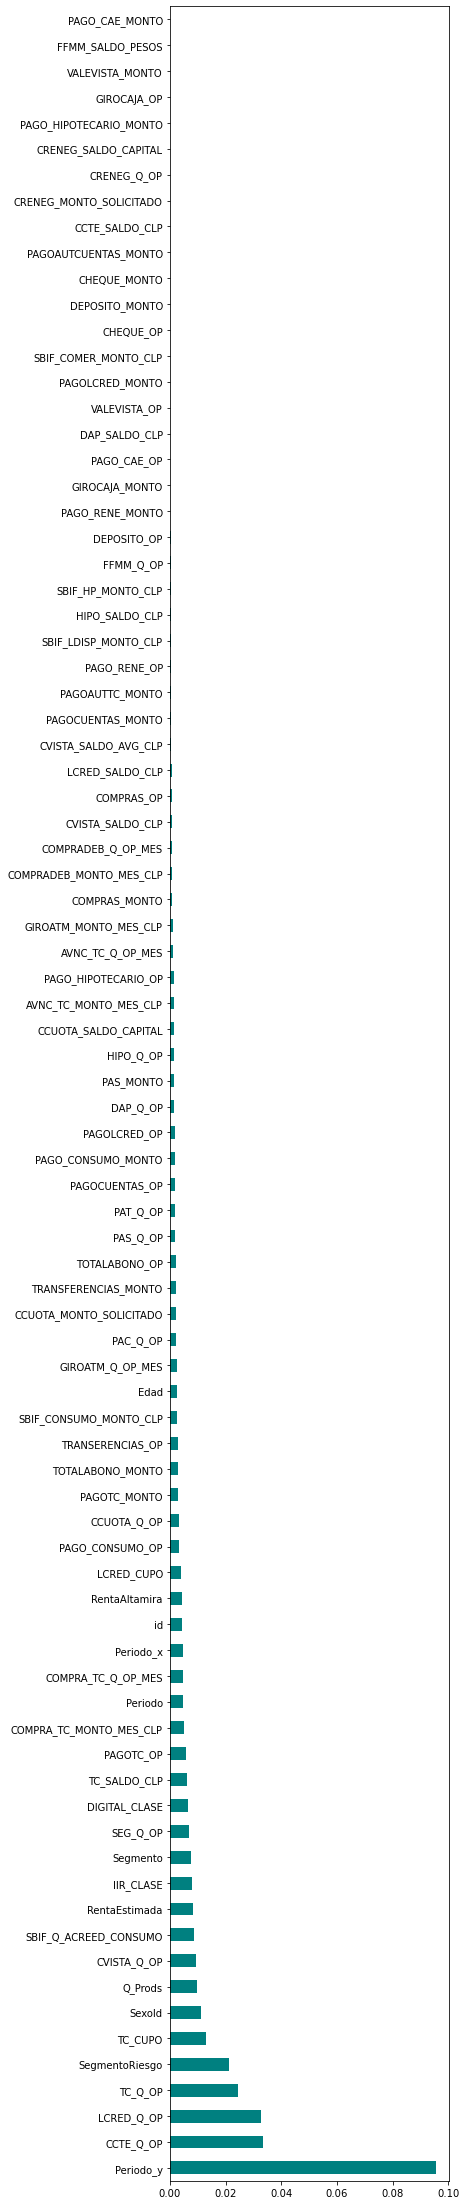

In [418]:
#plot feat_importances
feat_importances = importances.copy()
#sort
feat_importances = pd.Series(feat_importances, X.columns)
feat_importances = feat_importances[feat_importances.argsort()[::-1]]
plt.figure(figsize = (5,40))
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [421]:
feat_importances.head(17).index

Index(['Periodo_y', 'CCTE_Q_OP', 'LCRED_Q_OP', 'TC_Q_OP', 'SegmentoRiesgo',
       'TC_CUPO', 'SexoId', 'Q_Prods', 'CVISTA_Q_OP', 'SBIF_Q_ACREED_CONSUMO',
       'RentaEstimada', 'IIR_CLASE', 'Segmento', 'SEG_Q_OP', 'DIGITAL_CLASE',
       'TC_SALDO_CLP', 'PAGOTC_OP'],
      dtype='object')

In [538]:
X_cat = X.copy().astype(int)
chi2_features = SelectKBest(chi2, k=15)
X_kbest_features = chi2_features.fit_transform(abs(X_cat), Y)
print('original feature number: ', X_cat.shape[1])
print('reduced feature number: ', X_kbest_features.shape[1])


original feature number:  84
reduced feature number:  15


In [539]:
X_cat.columns[chi2_features.get_support()]

Index(['CCUOTA_MONTO_SOLICITADO', 'CCUOTA_SALDO_CAPITAL', 'DAP_SALDO_CLP',
       'FFMM_SALDO_PESOS', 'HIPO_SALDO_CLP', 'TC_CUPO', 'TC_SALDO_CLP',
       'AVNC_TC_MONTO_MES_CLP', 'COMPRA_TC_MONTO_MES_CLP',
       'SBIF_CONSUMO_MONTO_CLP', 'id', 'PAGOTC_MONTO', 'TRANSFERENCIAS_MONTO',
       'TOTALABONO_MONTO', 'Periodo_y'],
      dtype='object')

In [317]:
corr_features = ['TC_CUPO', 'TC_SALDO_CLP', 'COMPRA_TC_MONTO_MES_CLP',
       'COMPRA_TC_Q_OP_MES', 'PAGOTC_OP', 'AVNC_TC_MONTO_MES_CLP',
       'CCUOTA_SALDO_CAPITAL', 'SEG_Q_OP', 'CCUOTA_MONTO_SOLICITADO',
       'PAGO_CONSUMO_OP', 'PAGOTC_MONTO', 'AVNC_TC_Q_OP_MES', 'Edad',
       'SBIF_CONSUMO_MONTO_CLP', 'PAS_Q_OP', 'Q_Prods', 'TC_Q_OP',
       'CCUOTA_Q_OP', 'SBIF_Q_ACREED_CONSUMO']

mi_features = ['LCRED_Q_OP', 'CCTE_Q_OP', 'Periodo', 'TC_Q_OP', 'SexoId', 'Q_Prods',
       'Segmento', 'SBIF_Q_ACREED_CONSUMO', 'TC_CUPO', 'SEG_Q_OP', 'PAGOTC_OP',
       'CVISTA_Q_OP', 'TC_SALDO_CLP', 'COMPRA_TC_MONTO_MES_CLP',
       'PAGO_CONSUMO_OP']

mi_features_revisted = ['LCRED_Q_OP', 'CCTE_Q_OP', 'TC_Q_OP', 'TC_CUPO', 'SexoId',
       'CVISTA_Q_OP', 'Q_Prods', 'Segmento', 'SBIF_Q_ACREED_CONSUMO',
       'RentaEstimada', 'TC_SALDO_CLP', 'SEG_Q_OP', 'PAGOTC_OP',
       'COMPRA_TC_MONTO_MES_CLP']

chi2_features = ['RentaAltamira', 'CCUOTA_MONTO_SOLICITADO', 'CCUOTA_SALDO_CAPITAL',
       'FFMM_SALDO_PESOS', 'TC_CUPO', 'TC_SALDO_CLP', 'AVNC_TC_MONTO_MES_CLP',
       'COMPRA_TC_MONTO_MES_CLP', 'SBIF_CONSUMO_MONTO_CLP',
       'SBIF_LDISP_MONTO_CLP', 'Edad', 'PAGOTC_MONTO', 'PAS_MONTO',
       'TRANSFERENCIAS_MONTO', 'TOTALABONO_MONTO']


all_features = corr_features + mi_features + chi2_features

In [122]:
all_features = list(set(all_features))

In [123]:
len(all_features)

31

In [124]:
all_features

['SBIF_Q_ACREED_CONSUMO',
 'CCTE_Q_OP',
 'Segmento',
 'PAS_Q_OP',
 'Q_Prods',
 'TC_CUPO',
 'COMPRA_TC_Q_OP_MES',
 'SexoId',
 'PAGOTC_OP',
 'CCUOTA_SALDO_CAPITAL',
 'PAGOTC_MONTO',
 'PAS_MONTO',
 'AVNC_TC_MONTO_MES_CLP',
 'TC_Q_OP',
 'TOTALABONO_MONTO',
 'FFMM_SALDO_PESOS',
 'COMPRA_TC_MONTO_MES_CLP',
 'CCUOTA_MONTO_SOLICITADO',
 'PAGO_CONSUMO_OP',
 'Edad',
 'SEG_Q_OP',
 'SBIF_LDISP_MONTO_CLP',
 'Periodo',
 'RentaAltamira',
 'LCRED_Q_OP',
 'AVNC_TC_Q_OP_MES',
 'SBIF_CONSUMO_MONTO_CLP',
 'CCUOTA_Q_OP',
 'TC_SALDO_CLP',
 'CVISTA_Q_OP',
 'TRANSFERENCIAS_MONTO']

In [125]:
cols = ['SBIF_Q_ACREED_CONSUMO',
 'CCTE_Q_OP',
 'Segmento',
 'PAS_Q_OP',
 'Q_Prods',
 'TC_CUPO',
 'COMPRA_TC_Q_OP_MES',
 'SexoId',
 'PAGOTC_OP',
 'CCUOTA_SALDO_CAPITAL',
 'PAGOTC_MONTO',
 'PAS_MONTO',
 'AVNC_TC_MONTO_MES_CLP',
 'TC_Q_OP',
 'TOTALABONO_MONTO',
 'FFMM_SALDO_PESOS',
 'COMPRA_TC_MONTO_MES_CLP',
 'CCUOTA_MONTO_SOLICITADO',
 'PAGO_CONSUMO_OP',
 'Edad',
 'SEG_Q_OP',
 'SBIF_LDISP_MONTO_CLP',
 'Periodo',
 'RentaAltamira',
 'LCRED_Q_OP',
 'AVNC_TC_Q_OP_MES',
 'SBIF_CONSUMO_MONTO_CLP',
 'CCUOTA_Q_OP',
 'TC_SALDO_CLP',
 'CVISTA_Q_OP',
 'TRANSFERENCIAS_MONTO']

In [133]:
cols.copy() + ['flag_aumento'] 

['SBIF_Q_ACREED_CONSUMO',
 'CCTE_Q_OP',
 'Segmento',
 'PAS_Q_OP',
 'Q_Prods',
 'TC_CUPO',
 'COMPRA_TC_Q_OP_MES',
 'SexoId',
 'PAGOTC_OP',
 'CCUOTA_SALDO_CAPITAL',
 'PAGOTC_MONTO',
 'PAS_MONTO',
 'AVNC_TC_MONTO_MES_CLP',
 'TC_Q_OP',
 'TOTALABONO_MONTO',
 'FFMM_SALDO_PESOS',
 'COMPRA_TC_MONTO_MES_CLP',
 'CCUOTA_MONTO_SOLICITADO',
 'PAGO_CONSUMO_OP',
 'Edad',
 'SEG_Q_OP',
 'SBIF_LDISP_MONTO_CLP',
 'Periodo',
 'RentaAltamira',
 'LCRED_Q_OP',
 'AVNC_TC_Q_OP_MES',
 'SBIF_CONSUMO_MONTO_CLP',
 'CCUOTA_Q_OP',
 'TC_SALDO_CLP',
 'CVISTA_Q_OP',
 'TRANSFERENCIAS_MONTO',
 'flag_aumento']

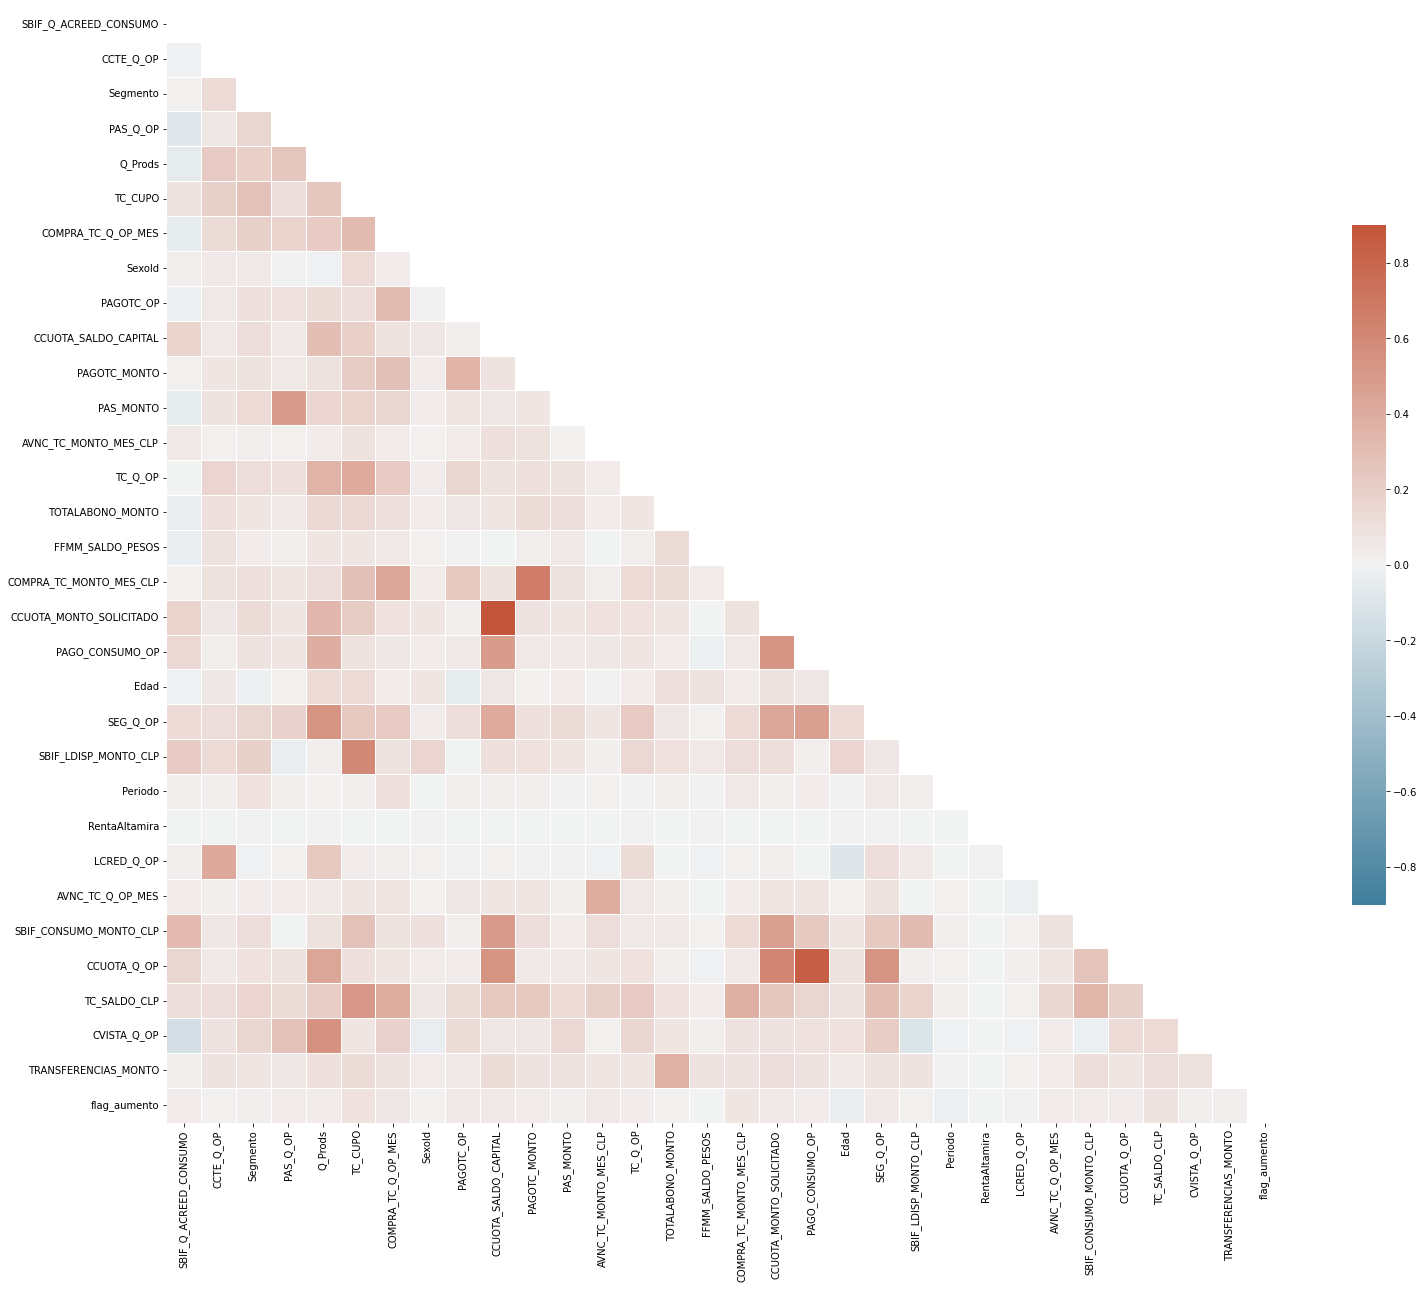

In [143]:
import seaborn as sns
corr = merged_dfs_concat[cols.copy() + ['flag_aumento']].corr()

plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, vmin=-0.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

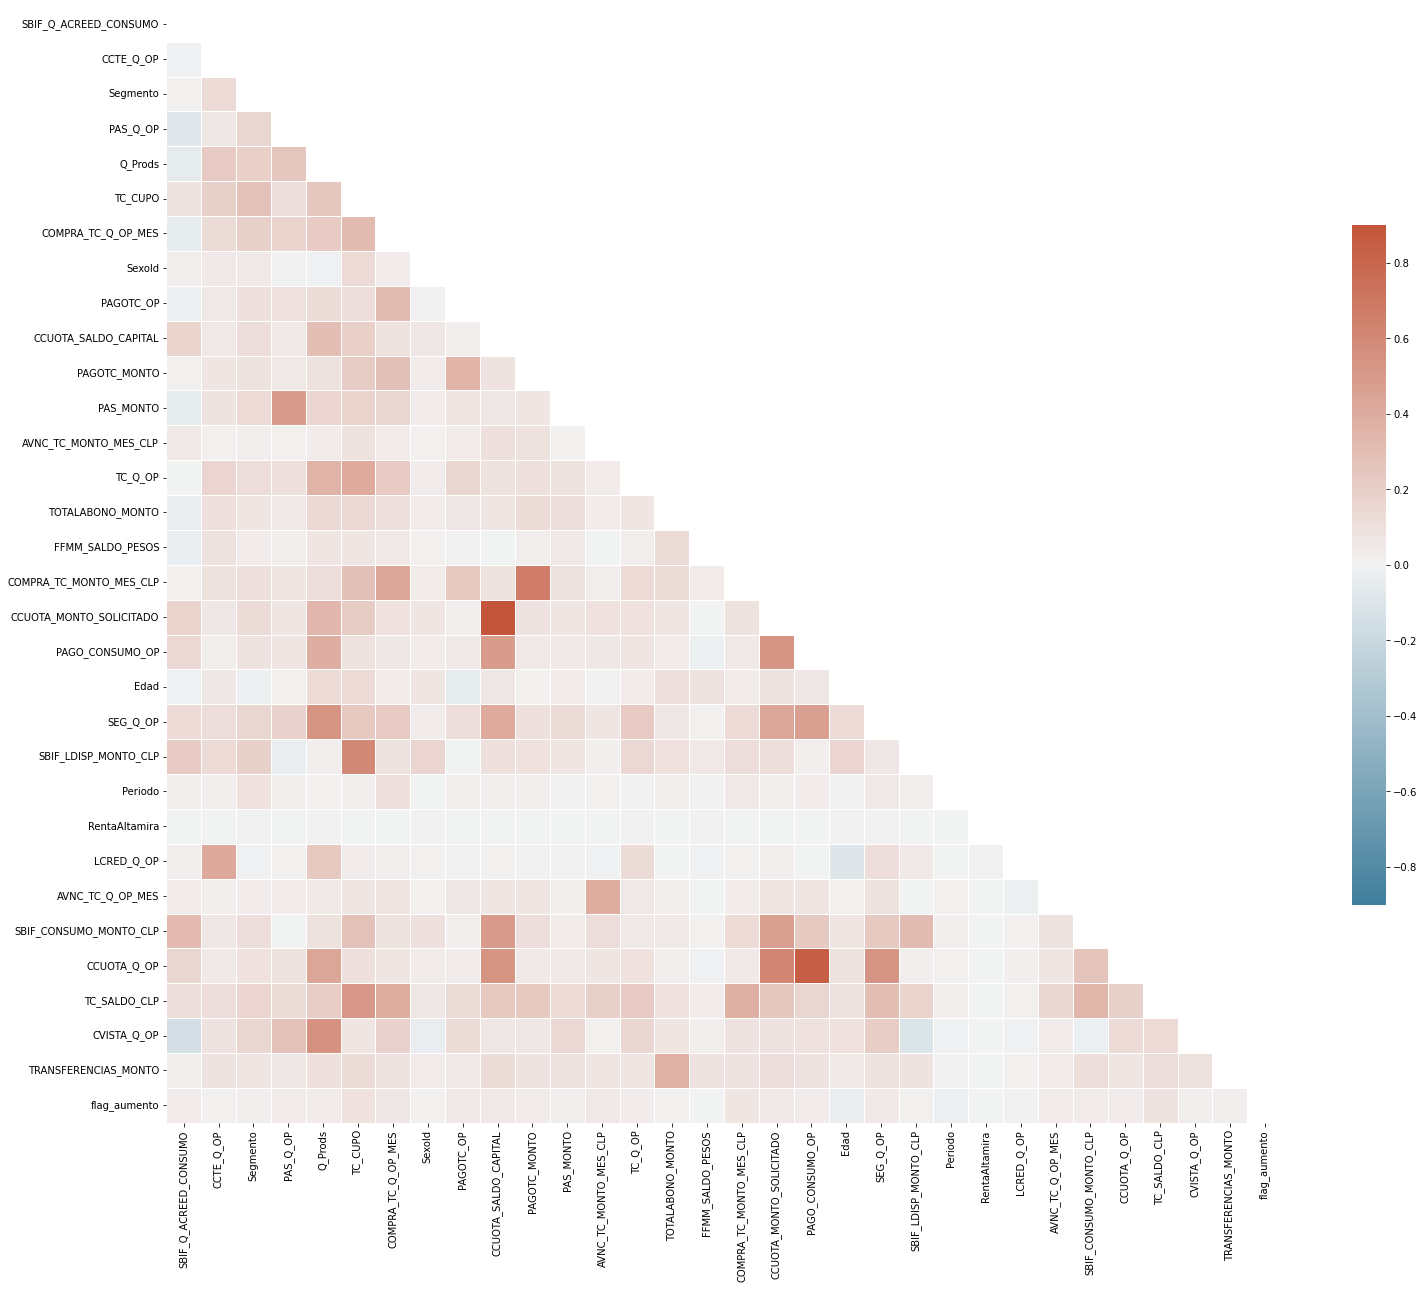

In [145]:
plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, vmin=-0.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [141]:
corr['flag_aumento'].sort_values(ascending=False)

flag_aumento               1.000000
TC_CUPO                    0.098395
TC_SALDO_CLP               0.077557
COMPRA_TC_MONTO_MES_CLP    0.070565
COMPRA_TC_Q_OP_MES         0.057982
AVNC_TC_MONTO_MES_CLP      0.053351
PAGOTC_OP                  0.051140
CCUOTA_SALDO_CAPITAL       0.049263
SEG_Q_OP                   0.047130
CCUOTA_MONTO_SOLICITADO    0.043271
AVNC_TC_Q_OP_MES           0.040583
PAGOTC_MONTO               0.040537
SBIF_CONSUMO_MONTO_CLP     0.039492
PAS_Q_OP                   0.038702
Q_Prods                    0.036465
PAGO_CONSUMO_OP            0.035059
TC_Q_OP                    0.033660
CCUOTA_Q_OP                0.031256
SBIF_Q_ACREED_CONSUMO      0.030475
PAS_MONTO                  0.025014
TRANSFERENCIAS_MONTO       0.024136
Segmento                   0.023508
CVISTA_Q_OP                0.021841
CCTE_Q_OP                  0.013662
TOTALABONO_MONTO           0.012561
SexoId                     0.010876
SBIF_LDISP_MONTO_CLP       0.009352
LCRED_Q_OP                 0

# PDD

In [384]:
periodos = [202208, 202207, 202206, 202205, 202204, 202203, 202202]
sc_Periodo = {}
for Periodo in periodos:
  sc_Periodo[Periodo] = saldos_consolidados[saldos_consolidados['Periodo'] == Periodo].copy()


cartola_Periodo = {}
for Periodo in periodos:
  cartola_Periodo[Periodo] = cartola[cartola['Periodo'] == Periodo].copy()

aumento_en = {}
periodos = aumento_cupo['Periodo'].unique()
for periodo in periodos:
  aumento_en[periodo] = aumento_cupo[aumento_cupo['Periodo'] == periodo]

merged_dfs = {}
for periodo in periodos:
  to_merge = sc_Periodo[periodo].copy()
  merged = to_merge.merge(cartola_Periodo[periodo], on= ['Periodo', 'id'], how = 'left')
  merged = merged.merge(aumento_en[periodo], on =  ['id'], how = 'left')
  merged['Periodo'] = periodo
  merged['Periodo_y'] =  merged['Periodo_y'].fillna(0)
  merged['flag_aumento'] = merged['flag_aumento'].fillna(0)
  merged_dfs[periodo] = merged.copy()


merged_dfs_concat = pd.concat([merged_dfs[periodo] for periodo in periodos])
merged_dfs_concat.shape

(1583880, 85)

In [6]:
periodos_validos = [202205, 202204, 202203, 202202]

periodos_validos_1 = periodos[:-2]
periodos_validos_1


array([202208, 202207, 202206, 202205, 202204], dtype=int64)

In [775]:
cols = ['SBIF_Q_ACREED_CONSUMO',
 'CCTE_Q_OP',
 'Segmento',
 'PAS_Q_OP',
 'Q_Prods',
 'TC_CUPO',
 'COMPRA_TC_Q_OP_MES',
 'SexoId',
 'PAGOTC_OP',
 'CCUOTA_SALDO_CAPITAL',
 'PAGOTC_MONTO',
 'PAS_MONTO',
 'AVNC_TC_MONTO_MES_CLP',
 'TC_Q_OP',
 'TOTALABONO_MONTO',
 'FFMM_SALDO_PESOS',
 'COMPRA_TC_MONTO_MES_CLP',
 'Edad',
 'SEG_Q_OP',
 'RentaAltamira',
 'LCRED_Q_OP',
 'AVNC_TC_Q_OP_MES',
 'SBIF_CONSUMO_MONTO_CLP',
 'CCUOTA_Q_OP',
 'TC_SALDO_CLP',
 'CVISTA_Q_OP',
 'TRANSFERENCIAS_MONTO',
 'SegmentoRiesgo',
 'IIR_CLASE',
  'DIGITAL_CLASE']

# cols = ['CCTE_Q_OP', 'LCRED_Q_OP', 'TC_Q_OP', 'SegmentoRiesgo',
#        'TC_CUPO', 'SexoId', 'Q_Prods', 'CVISTA_Q_OP', 'SBIF_Q_ACREED_CONSUMO',
#        'RentaAltamira', 'IIR_CLASE', 'Segmento', 'SEG_Q_OP', 'DIGITAL_CLASE',
#        'TC_SALDO_CLP', 'PAGOTC_OP']

# cols = ['CCUOTA_MONTO_SOLICITADO', 'CCUOTA_SALDO_CAPITAL', 'DAP_SALDO_CLP',
#        'FFMM_SALDO_PESOS', 'HIPO_SALDO_CLP', 'TC_CUPO', 'TC_SALDO_CLP',
#        'AVNC_TC_MONTO_MES_CLP', 'COMPRA_TC_MONTO_MES_CLP',
#        'SBIF_CONSUMO_MONTO_CLP', 'PAGOTC_MONTO', 'TRANSFERENCIAS_MONTO',
#        'TOTALABONO_MONTO']

# cols = ['CCUOTA_MONTO_SOLICITADO', 'CCUOTA_SALDO_CAPITAL', 'DAP_SALDO_CLP','CCTE_Q_OP', 'LCRED_Q_OP', 'TC_Q_OP', 'SegmentoRiesgo']#, 'Edad']

In [776]:
cols

['SBIF_Q_ACREED_CONSUMO',
 'CCTE_Q_OP',
 'Segmento',
 'PAS_Q_OP',
 'Q_Prods',
 'TC_CUPO',
 'COMPRA_TC_Q_OP_MES',
 'SexoId',
 'PAGOTC_OP',
 'CCUOTA_SALDO_CAPITAL',
 'PAGOTC_MONTO',
 'PAS_MONTO',
 'AVNC_TC_MONTO_MES_CLP',
 'TC_Q_OP',
 'TOTALABONO_MONTO',
 'FFMM_SALDO_PESOS',
 'COMPRA_TC_MONTO_MES_CLP',
 'Edad',
 'SEG_Q_OP',
 'RentaAltamira',
 'LCRED_Q_OP',
 'AVNC_TC_Q_OP_MES',
 'SBIF_CONSUMO_MONTO_CLP',
 'CCUOTA_Q_OP',
 'TC_SALDO_CLP',
 'CVISTA_Q_OP',
 'TRANSFERENCIAS_MONTO',
 'SegmentoRiesgo',
 'IIR_CLASE',
 'DIGITAL_CLASE']

In [586]:
periodos_validos

[202205, 202204, 202203, 202202]

In [543]:
#get a list with the unique values of thelist 
set([1,3,1,1,1,1,1])


{1, 3}

In [777]:
raw_df = merged_dfs_concat.copy()[ list(set(cols.copy() + ['flag_aumento', 'Periodo', 'Periodo_y', 'id']))]
df_cupo = raw_df.copy()[merged_dfs_concat['flag_aumento'] == 1]
df_no_cupo = raw_df.copy()[merged_dfs_concat['flag_aumento'] == 0]

In [778]:
cupo_periodo = {}
no_cupo_periodo = {}
for periodo in periodos:
    cupo_periodo[periodo] = df_cupo[df_cupo['Periodo'] == periodo]
    no_cupo_periodo[periodo] = df_no_cupo[df_no_cupo['Periodo'] == periodo]

In [779]:
no_cupo_periodo[202206]

,flag_aumento,TOTALABONO_MONTO,CVISTA_Q_OP,PAGOTC_OP,COMPRA_TC_MONTO_MES_CLP,IIR_CLASE,Periodo_y,AVNC_TC_MONTO_MES_CLP,AVNC_TC_Q_OP_MES,CCTE_Q_OP,...,FFMM_SALDO_PESOS,PAS_Q_OP,Q_Prods,SegmentoRiesgo,Periodo,COMPRA_TC_Q_OP_MES,CCUOTA_SALDO_CAPITAL,SBIF_CONSUMO_MONTO_CLP,PAS_MONTO,CCUOTA_Q_OP
0,0.0,3320.590909,1,0.0,0.000000,4,0.0,0.0,0,1,...,13050.064773,0,9,1,202206,0,6937.697886,8446.590909,0.000000,2
1,0.0,927.450000,0,0.0,0.000000,1,0.0,0.0,0,1,...,0.000000,0,5,2,202206,0,662.298864,1979.545455,0.000000,1
2,0.0,NaN,0,NaN,0.000000,1,0.0,0.0,0,0,...,5465.738636,0,2,2,202206,0,0.000000,0.000000,NaN,0
3,0.0,3303.739773,1,0.0,0.000000,1,0.0,0.0,0,1,...,0.000000,0,4,1,202206,0,0.000000,7390.909091,0.000000,0
5,0.0,1870.454545,0,0.0,462.678409,3,0.0,0.0,0,1,...,0.000000,0,4,1,202206,9,0.000000,34151.136364,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229739,0.0,0.000000,0,1.0,28.880682,3,0.0,0.0,0,1,...,0.000000,0,4,1,202206,1,0.000000,28.409091,0.000000,0
229740,0.0,63901.157955,0,0.0,1720.164773,2,0.0,0.0,0,1,...,0.000000,1,4,2,202206,14,0.000000,2385.227273,6900.021591,0
229741,0.0,1323.090909,2,0.0,0.000000,3,0.0,0.0,0,1,...,0.000000,0,5,1,202206,0,0.000000,0.000000,0.000000,0
229742,0.0,0.000000,1,3.0,1002.607955,1,0.0,0.0,0,1,...,0.000000,0,5,1,202206,49,0.000000,739.772727,0.000000,0


In [780]:
periodos_validos_1 = periodos[:-2]
periodos_validos_1

array([202208, 202207, 202206, 202205, 202204], dtype=int64)

In [781]:
raw_df[(raw_df['Periodo_y'] == periodo) ]

,flag_aumento,TOTALABONO_MONTO,CVISTA_Q_OP,PAGOTC_OP,COMPRA_TC_MONTO_MES_CLP,IIR_CLASE,Periodo_y,AVNC_TC_MONTO_MES_CLP,AVNC_TC_Q_OP_MES,CCTE_Q_OP,...,FFMM_SALDO_PESOS,PAS_Q_OP,Q_Prods,SegmentoRiesgo,Periodo,COMPRA_TC_Q_OP_MES,CCUOTA_SALDO_CAPITAL,SBIF_CONSUMO_MONTO_CLP,PAS_MONTO,CCUOTA_Q_OP
64,1.0,166.375000,0,1.0,23.854545,5,202202.0,0.0,0,1,...,0.000000,0,5,1,202202,2,0.000000,27394.318182,0.000000,0
157,1.0,2005.812500,1,1.0,630.325000,2,202202.0,0.0,0,1,...,0.000000,1,5,1,202202,10,1352.795455,6686.363636,627.386364,4
219,1.0,5710.767045,0,0.0,2581.378409,5,202202.0,0.0,0,1,...,9621.794318,0,4,1,202202,95,0.000000,11102.272727,0.000000,0
243,1.0,335.243182,1,3.0,301.495455,4,202202.0,0.0,0,1,...,0.000000,0,5,1,202202,8,0.000000,8432.954545,0.000000,0
349,1.0,2356.640909,0,1.0,360.743182,2,202202.0,0.0,0,1,...,0.000000,2,4,1,202202,6,8499.914773,10803.409091,2208.913636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218037,1.0,1524.306818,1,3.0,476.976136,4,202202.0,0.0,0,1,...,0.000000,0,6,1,202202,29,1409.006818,16762.500000,0.000000,1
218040,1.0,48.254545,1,0.0,1525.913409,2,202202.0,0.0,0,2,...,0.000000,0,6,1,202202,36,0.000000,2210.227273,0.000000,0
218059,1.0,1363.636364,0,1.0,80.856818,3,202202.0,0.0,0,1,...,0.000000,0,4,1,202202,3,0.000000,8989.772727,0.000000,0
218087,1.0,3364.651136,1,3.0,980.162500,4,202202.0,0.0,0,1,...,0.000000,0,6,1,202202,32,1400.134091,5318.181818,0.000000,1


In [782]:
raw_df[(periodo-4 < raw_df['Periodo']) & (raw_df['Periodo'] <= periodo ) & (raw_df['Periodo_y'] == periodo) ]

,flag_aumento,TOTALABONO_MONTO,CVISTA_Q_OP,PAGOTC_OP,COMPRA_TC_MONTO_MES_CLP,IIR_CLASE,Periodo_y,AVNC_TC_MONTO_MES_CLP,AVNC_TC_Q_OP_MES,CCTE_Q_OP,...,FFMM_SALDO_PESOS,PAS_Q_OP,Q_Prods,SegmentoRiesgo,Periodo,COMPRA_TC_Q_OP_MES,CCUOTA_SALDO_CAPITAL,SBIF_CONSUMO_MONTO_CLP,PAS_MONTO,CCUOTA_Q_OP
64,1.0,166.375000,0,1.0,23.854545,5,202202.0,0.0,0,1,...,0.000000,0,5,1,202202,2,0.000000,27394.318182,0.000000,0
157,1.0,2005.812500,1,1.0,630.325000,2,202202.0,0.0,0,1,...,0.000000,1,5,1,202202,10,1352.795455,6686.363636,627.386364,4
219,1.0,5710.767045,0,0.0,2581.378409,5,202202.0,0.0,0,1,...,9621.794318,0,4,1,202202,95,0.000000,11102.272727,0.000000,0
243,1.0,335.243182,1,3.0,301.495455,4,202202.0,0.0,0,1,...,0.000000,0,5,1,202202,8,0.000000,8432.954545,0.000000,0
349,1.0,2356.640909,0,1.0,360.743182,2,202202.0,0.0,0,1,...,0.000000,2,4,1,202202,6,8499.914773,10803.409091,2208.913636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218037,1.0,1524.306818,1,3.0,476.976136,4,202202.0,0.0,0,1,...,0.000000,0,6,1,202202,29,1409.006818,16762.500000,0.000000,1
218040,1.0,48.254545,1,0.0,1525.913409,2,202202.0,0.0,0,2,...,0.000000,0,6,1,202202,36,0.000000,2210.227273,0.000000,0
218059,1.0,1363.636364,0,1.0,80.856818,3,202202.0,0.0,0,1,...,0.000000,0,4,1,202202,3,0.000000,8989.772727,0.000000,0
218087,1.0,3364.651136,1,3.0,980.162500,4,202202.0,0.0,0,1,...,0.000000,0,6,1,202202,32,1400.134091,5318.181818,0.000000,1


In [783]:
 # Create grops of 3 prior periods mean and 1 future target period
grouped_cupo = {}
grouped_no_cupo = {}
target = {} ## id and flag_aumento
for periodo in periodos[:-2]:
    try:
        id_cupo_periodo = raw_df[(raw_df['Periodo'] == periodo+1) & (raw_df['flag_aumento'] == 1)]['id']
        id_no_cupo_periodo = raw_df[(raw_df['Periodo'] == periodo+1) & (raw_df['flag_aumento'] == 0)]['id']
        grouped_cupo[periodo] = raw_df[(periodo-3 < raw_df['Periodo']) & (raw_df['Periodo'] <= periodo ) & (raw_df.id.map(int).isin(((tuple(id_cupo_periodo.reset_index(drop=True)))))) ].groupby('id').mean().reset_index()
        grouped_no_cupo[periodo] = raw_df[(periodo-3 < raw_df['Periodo']) & (raw_df['Periodo'] <= periodo ) & (raw_df.id.map(int).isin(((tuple(id_no_cupo_periodo.reset_index(drop=True)))))) ].groupby('id').mean().reset_index()
        target[periodo] = raw_df[raw_df['Periodo'] == periodo+1][['id', 'Periodo_y', 'flag_aumento']]
    except Exception as e:
        print(e)

In [784]:
#merge on id
grouped_cupo_m = {}
grouped_no_cupo_m = {}
total = {}
for periodo in periodos[:-2]:
    grouped_cupo_m[periodo] = grouped_cupo[periodo].merge(target[periodo], on='id', how='left')
    grouped_no_cupo_m[periodo] = grouped_no_cupo[periodo].merge(target[periodo], on='id', how='left')

    total[periodo] = pd.concat([grouped_cupo[periodo], grouped_no_cupo[periodo]])

In [785]:
periodos_validos_1

array([202208, 202207, 202206, 202205, 202204], dtype=int64)

In [786]:
data_cocida = pd.DataFrame()
data_cocida_n = pd.DataFrame()
for periodo in periodos_validos_1[1:]:
    data_cocida = pd.concat([data_cocida, grouped_cupo_m[periodo]])
    data_cocida_n = pd.concat([data_cocida_n, grouped_no_cupo_m[periodo]])
    
    
    

In [787]:
#drop columns that have > 50% of null values
data_cocida.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida)).fillna(0)

,id,flag_aumento_x,TOTALABONO_MONTO,CVISTA_Q_OP,PAGOTC_OP,COMPRA_TC_MONTO_MES_CLP,IIR_CLASE,Periodo_y_x,AVNC_TC_MONTO_MES_CLP,AVNC_TC_Q_OP_MES,...,Q_Prods,SegmentoRiesgo,Periodo,COMPRA_TC_Q_OP_MES,CCUOTA_SALDO_CAPITAL,SBIF_CONSUMO_MONTO_CLP,PAS_MONTO,CCUOTA_Q_OP,Periodo_y_y,flag_aumento_y
0,85,0.000000,12933.064773,0.0,3.333333,2280.497746,4.000000,0.0,0.000000,0.000000,...,5.000000,1.000000,202206.0,15.333333,0.000000,4289.772727,0.000000,0.000000,202208.0,1.0
1,97,0.000000,7605.306439,1.0,6.333333,2217.296299,0.000000,0.0,289.919962,1.000000,...,5.000000,1.000000,202206.0,20.666667,0.000000,14705.303030,331.025758,0.000000,202208.0,1.0
2,261,0.000000,1679.740909,0.0,0.333333,0.000000,4.333333,0.0,113.636364,0.333333,...,6.000000,2.333333,202206.0,0.000000,191.213636,2007.196970,0.000000,1.000000,202208.0,1.0
3,294,0.333333,11995.842045,0.0,0.000000,1353.615152,2.000000,67402.0,0.000000,0.000000,...,6.000000,1.000000,202206.0,7.000000,0.000000,1072.727273,0.000000,0.000000,202208.0,1.0
4,422,0.000000,17132.754924,1.0,4.000000,2295.799110,0.666667,0.0,0.000000,0.000000,...,5.000000,1.000000,202206.0,9.000000,0.000000,3284.469697,0.000000,0.000000,202208.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16928,230932,0.000000,1035.220076,0.0,0.000000,84.889015,1.000000,0.0,0.000000,0.000000,...,3.333333,1.666667,202203.0,0.333333,0.000000,544.318182,513.589015,0.000000,202205.0,1.0
16929,230937,0.000000,3138.851894,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,4.000000,1.333333,202203.0,0.000000,0.000000,284.848485,1420.454545,0.000000,202205.0,1.0
16930,230941,0.000000,3345.537121,0.0,4.000000,2773.827420,3.000000,0.0,491.677652,0.333333,...,5.000000,2.000000,202203.0,56.000000,8409.575758,16589.393939,0.000000,1.666667,202205.0,1.0
16931,231013,0.666667,2881.363258,1.0,2.000000,1213.167424,2.666667,134802.0,0.000000,0.000000,...,6.000000,1.000000,202203.0,34.333333,1336.287879,5857.196970,0.000000,1.000000,202205.0,1.0


In [788]:

data_cocida_n.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida_n)).fillna(0)

,id,flag_aumento_x,TOTALABONO_MONTO,CVISTA_Q_OP,PAGOTC_OP,COMPRA_TC_MONTO_MES_CLP,IIR_CLASE,Periodo_y_x,AVNC_TC_MONTO_MES_CLP,AVNC_TC_Q_OP_MES,...,Q_Prods,SegmentoRiesgo,Periodo,COMPRA_TC_Q_OP_MES,CCUOTA_SALDO_CAPITAL,SBIF_CONSUMO_MONTO_CLP,PAS_MONTO,CCUOTA_Q_OP,Periodo_y_y,flag_aumento_y
0,1,0.000000,4780.792424,1.0,0.0,0.000000,4.000000,0.000000,0.0,0.0,...,9.000000,1.000000,202206.0,0.0,6934.531527,8322.348485,0.0,2.000000,0.0,0.0
1,2,0.000000,865.968182,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,...,4.666667,1.333333,202206.0,0.0,660.632576,1946.969697,0.0,0.666667,0.0,0.0
2,3,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,...,2.000000,2.000000,202206.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,4,0.000000,3459.762500,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,...,4.000000,1.000000,202206.0,0.0,0.000000,7348.484848,0.0,0.000000,0.0,0.0
4,5,0.666667,6335.269318,0.0,1.0,1428.418659,4.000000,134804.333333,0.0,0.0,...,4.000000,1.000000,202206.0,30.0,0.000000,1915.909091,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895465,231810,0.000000,401.137500,0.0,0.5,0.000000,1.000000,0.000000,0.0,0.0,...,2.000000,2.666667,202203.0,0.0,0.000000,78348.106061,0.0,0.000000,0.0,0.0
895466,231811,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,...,1.000000,1.333333,202203.0,0.0,0.000000,17765.530303,0.0,0.000000,0.0,0.0
895467,231812,0.000000,87.363636,0.0,0.0,0.000000,4.000000,0.000000,0.0,0.0,...,4.000000,1.000000,202203.0,0.0,0.000000,153.787879,0.0,0.000000,0.0,0.0
895468,231813,0.000000,0.000000,0.0,0.0,0.000000,4.333333,0.000000,0.0,0.0,...,3.000000,1.333333,202203.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [1298]:
train_f = data_cocida.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida)).fillna(0).sample(int(10000))

X_train = train_f[cols]
Y_train = train_f['flag_aumento_y']

train_n = data_cocida_n.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida_n)).fillna(0).sample(int(60000*2.2))

X_train = X_train.append(train_n[cols])
Y_train = Y_train.append(train_n['flag_aumento_y'])


val_f = data_cocida.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida)).fillna(0).drop(index = train_f.index).sample(300)
val_n = data_cocida_n.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida_n)).fillna(0).drop(index = train_n.index).sample(15000)

X_val = val_f[cols]
Y_val = val_f['flag_aumento_y']

X_val = X_val.append(val_n[cols])
Y_val = Y_val.append(val_n['flag_aumento_y'])




test_f = data_cocida.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida)).fillna(0).drop(index = train_f.index).drop(index = val_f.index).sample(5000)
test_n = data_cocida_n.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida_n)).fillna(0).drop(index = train_n.index).drop(index = val_n.index).sample(5000)

X_test = test_f[cols]
Y_test = test_f['flag_aumento_y']

X_test = X_test.append(test_n[cols])
Y_test = Y_test.append(test_n['flag_aumento_y'])


C:\Users\Joaquín\AppData\Local\Temp\ipykernel_6712\2901486708.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(train_n[cols])
C:\Users\Joaquín\AppData\Local\Temp\ipykernel_6712\2901486708.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_train = Y_train.append(train_n['flag_aumento_y'])
C:\Users\Joaquín\AppData\Local\Temp\ipykernel_6712\2901486708.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_val = X_val.append(val_n[cols])
C:\Users\Joaquín\AppData\Local\Temp\ipykernel_6712\2901486708.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_val = Y_val.append(val_n['flag_aumento_y'])
C:\Users\Joa

In [596]:
# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [285]:
print(len(data_cocida), len(data_cocida_n))

16933 895470


In [861]:
((16933+895470)/16933)**-1

0.01855868514242062

In [1341]:
#generate a random baseline
y_random = np.random.choice([0,1], size=len(Y_test), p = [1-0.01, 0.01])
print(classification_report(Y_test, y_random, digits=4))

              precision    recall  f1-score   support

         0.0     0.9852    0.9899    0.9876    200000
         1.0     0.0162    0.0110    0.0131      3000

    accuracy                         0.9755    203000
   macro avg     0.5007    0.5005    0.5003    203000
weighted avg     0.9709    0.9755    0.9732    203000



In [1342]:
#get true positives
tp = np.sum(np.logical_and(y_random == 1, Y_test == 1))
#get true negatives
tn = np.sum(np.logical_and(y_random == 0, Y_test == 0))
#get false positives
fp = np.sum(np.logical_and(y_random == 1, Y_test == 0))
#get false negatives
fn = np.sum(np.logical_and(y_random == 0, Y_test == 1))

print(' true positives:', tp, '\n true negatives' ,tn, '\n False positives' ,fp, '\n False negatives' ,fn)

 true positives: 33 
 true negatives 197990 
 False positives 2010 
 False negatives 2967


In [730]:
#get kohen kappa
kohen_kappa = cohen_kappa_score(Y_test, y_random)
print(kohen_kappa)

-0.0009999999999998899


In [1315]:
# clf4 = XGBClassifier(objective="binary:logistic", gamma= 0, max_depth= 6,
#  min_child_weight= 1,
#  reg_lambda= 10,
#  scale_pos_weight= 0.3,
#  n_estimators = 1000,
#  eval_metric = 'auc')

# clf3 = XGBClassifier(
#     learning_rate =0.05, n_estimators=1000,
#     max_depth=6, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
#     objective= 'binary:logistic', nthread=4,scale_pos_weight=2.3,seed=2,eval_metric = 'map')

# clf3.fit(X_train, Y_train, early_stopping_rounds=100, 
#              eval_set=[(X_val, Y_val)], verbose=1)

#mean average precision
clf2 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    max_depth=7, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1.8,seed=27,eval_metric = 'map')

clf2.fit(X_train, Y_train, early_stopping_rounds=50, 
             eval_set=[(X_val, Y_val)], verbose=1)


c:\ProgramData\Anaconda3\envs\obsolescence\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\ProgramData\Anaconda3\envs\obsolescence\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-map:0.06006
[1]	validation_0-map:0.05722
[2]	validation_0-map:0.05694
[3]	validation_0-map:0.06236
[4]	validation_0-map:0.06518
[5]	validation_0-map:0.06509
[6]	validation_0-map:0.06670
[7]	validation_0-map:0.06667
[8]	validation_0-map:0.06561
[9]	validation_0-map:0.06546
[10]	validation_0-map:0.06626
[11]	validation_0-map:0.06549
[12]	validation_0-map:0.06520
[13]	validation_0-map:0.06610
[14]	validation_0-map:0.06728
[15]	validation_0-map:0.06697
[16]	validation_0-map:0.06683
[17]	validation_0-map:0.06692
[18]	validation_0-map:0.06819
[19]	validation_0-map:0.06856
[20]	validation_0-map:0.06896
[21]	validation_0-map:0.06871
[22]	validation_0-map:0.06892
[23]	validation_0-map:0.06965
[24]	validation_0-map:0.06934
[25]	validation_0-map:0.06949
[26]	validation_0-map:0.06929
[27]	validation_0-map:0.06988
[28]	validation_0-map:0.07014
[29]	validation_0-map:0.07081
[30]	validation_0-map:0.07128
[31]	validation_0-map:0.07132
[32]	validation_0-map:0.07175
[33]	validation_0-ma

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='map', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1.8, seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, ...)

In [1309]:

test_f = data_cocida.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida)).fillna(0).drop(index = train_f.index).drop(index = val_f.index).sample(3000)
test_n = data_cocida_n.copy().reset_index(drop= True).dropna(axis=1, thresh=0.5*len(data_cocida_n)).fillna(0).drop(index = train_n.index).drop(index = val_n.index).sample(200000)

X_test = test_f[cols]
Y_test = test_f['flag_aumento_y']

X_test = X_test.append(test_n[cols])
Y_test = Y_test.append(test_n['flag_aumento_y'])

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_6712\401906086.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test.append(test_n[cols])
C:\Users\Joaquín\AppData\Local\Temp\ipykernel_6712\401906086.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_test = Y_test.append(test_n['flag_aumento_y'])


In [1316]:
y_pred = clf2.predict(X_test)
print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9862    0.9922    0.9892    200000
         1.0     0.1216    0.0723    0.0907      3000

    accuracy                         0.9786    203000
   macro avg     0.5539    0.5322    0.5399    203000
weighted avg     0.9734    0.9786    0.9759    203000



In [1317]:
#get cohen kappa
kohen_kappa = cohen_kappa_score(Y_test, y_pred)
print(kohen_kappa)


0.08058531018857873


In [1318]:
np.unique(y_pred, return_counts=True)

(array([0., 1.]), array([201216,   1784], dtype=int64))

In [1319]:
np.unique(Y_test, return_counts=True)

(array([0., 1.]), array([200000,   3000], dtype=int64))

In [1340]:
#get true positives
tp = np.sum(np.logical_and(y_pred == 1, Y_test == 1))
#get true negatives
tn = np.sum(np.logical_and(y_pred == 0, Y_test == 0))
#get false positives
fp = np.sum(np.logical_and(y_pred == 1, Y_test == 0))
#get false negatives
fn = np.sum(np.logical_and(y_pred == 0, Y_test == 1))

print(' true positives:', tp, '\n true negatives' ,tn, '\n False positives' ,fp, '\n False negatives' ,fn)

 true positives: 217 
 true negatives 198433 
 False positives 1567 
 False negatives 2783


In [ ]:
#prediction data

 # Create grops of 3 prior periods mean and 1 future target period
grouped_cupo = {}
grouped_no_cupo = {}
target = {} ## id and flag_aumento
periodo = 202208
try:
    id_cupo_periodo = raw_df[(raw_df['Periodo'] == periodo+1) & (raw_df['flag_aumento'] == 1)]['id']
    id_no_cupo_periodo = raw_df[(raw_df['Periodo'] == periodo+1) & (raw_df['flag_aumento'] == 0)]['id']
    grouped_cupo[periodo] = raw_df[(periodo-3 < raw_df['Periodo']) & (raw_df['Periodo'] <= periodo ) & (raw_df.id.map(int).isin(((tuple(id_cupo_periodo.reset_index(drop=True)))))) ].groupby('id').mean().reset_index()
    grouped_no_cupo[periodo] = raw_df[(periodo-3 < raw_df['Periodo']) & (raw_df['Periodo'] <= periodo ) & (raw_df.id.map(int).isin(((tuple(id_no_cupo_periodo.reset_index(drop=True)))))) ].groupby('id').mean().reset_index()
    target[periodo] = raw_df[raw_df['Periodo'] == periodo+1][['id', 'Periodo_y', 'flag_aumento']]
except Exception as e:
    print(e)

In [1321]:
periodo = 202208

promedio_202208 = raw_df[(periodo-3 < raw_df['Periodo']) & (raw_df['Periodo'] <= periodo )].groupby('id').mean().reset_index()

In [1322]:
promedio_202208['id']

0              1
1              2
2              3
3              4
4              5
           ...  
231679    231680
231680    231681
231681    231682
231682    231683
231683    231684
Name: id, Length: 231684, dtype: int64

In [1323]:
ids = pd.DataFrame(promedio_202208['id'])

data_to_predict = promedio_202208[cols]

In [1324]:
y_pred_final = clf2.predict(data_to_predict)

c:\ProgramData\Anaconda3\envs\obsolescence\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [1325]:
np.unique(y_pred_final, return_counts=True)

(array([0., 1.]), array([229512,   2172], dtype=int64))

In [1326]:
ids['target'] = y_pred_final

In [1331]:
ids.to_csv('JOAQUIN_ORTEGA_20221130_V2.csv')

# OLD

In [ ]:
#condense merged dfs to 3 periods
merged_dfs_3 = {}
for periodo in periodos_validos:
    merged_dfs_3[periodo] = merged_dfs[periodo].copy().drop('flag_aumento', axis=1)
    

In [32]:
X_kbest_features

array([[  9121,   6676,   1136, ...,      1,   2017,   3794],
       [     0,      0,   6818, ...,      2,      0,    306],
       [     0,      0,   1022, ...,      3,      0,      0],
       ...,
       [     0,      0,   3409, ..., 231117,      0,      0],
       [     0,      0,   5681, ..., 231118,     69,   5316],
       [     0,      0,   3409, ..., 231119,   3533,  10204]])

In [50]:
X_cat

,Edad,SexoId,Segmento,RentaAltamira,RentaEstimada,Q_Prods,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,CCUOTA_MONTO_SOLICITADO,...,PAGOAUTCUENTAS_MONTO,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP
0,74,0,1,685,0,9,1,10586,2,9121,...,7,158,195,2,416,1,0,0,0,0
1,68,1,2,0,0,4,1,316,0,0,...,0,0,0,0,0,0,0,0,0,0
2,74,1,1,511,568,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80,0,2,1704,1704,4,1,0,0,0,...,0,59,0,0,0,0,0,0,0,0
4,77,1,3,0,1704,4,1,0,0,0,...,257,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231344,50,1,6,4013,0,4,1,5489,0,0,...,7,0,0,0,0,0,0,0,0,0
231345,44,1,6,8181,0,4,1,74037,0,0,...,7,4138,0,0,0,0,0,0,0,0
231346,48,1,3,4417,0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231347,37,1,6,14657,0,5,1,6764,0,0,...,0,0,0,0,0,0,0,0,0,0


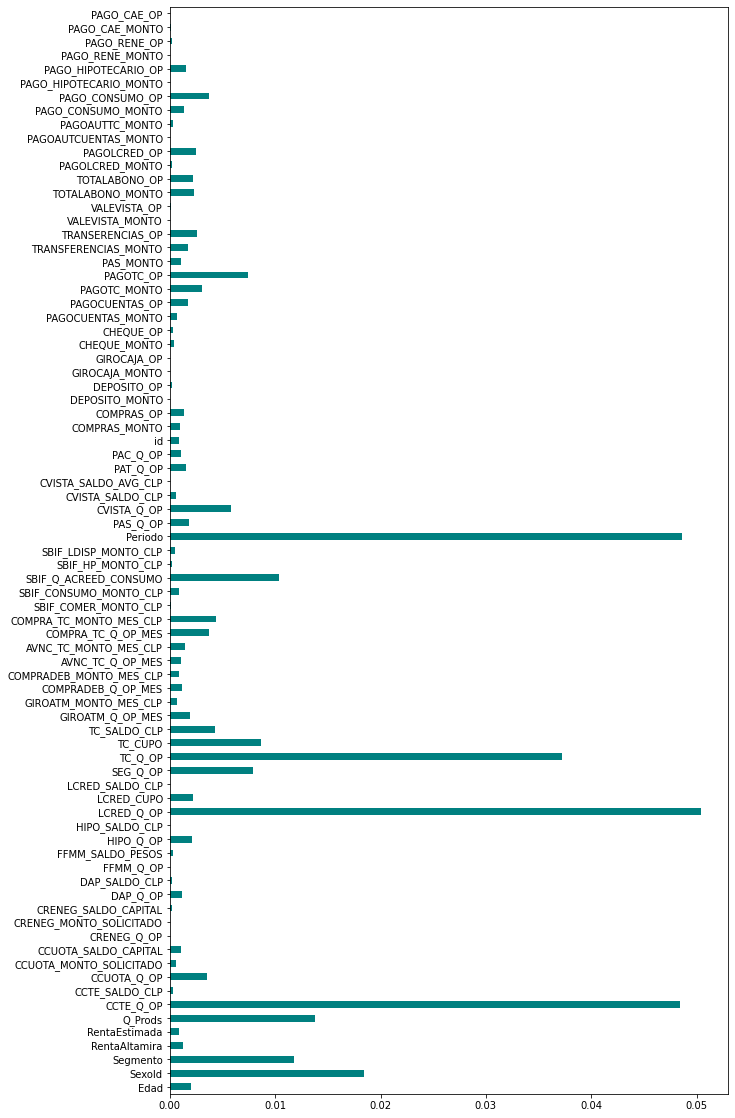

In [31]:
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
plt.figure(figsize=(10,20))
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [92]:
merged_dfs_concat.fillna(-1)

,Edad,SexoId,Segmento,RentaAltamira,RentaEstimada,Q_Prods,SegmentoRiesgo,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,...,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP,flag_aumento
0,74,0,1,685.667045,-1.000000,9,a,1,10586.322727,2,...,158.373864,195.376136,2.0,416.306818,1.0,0.0,0.0,0.0,0.0,0.0
1,68,1,2,0.000000,-1.000000,4,a,1,316.987500,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,74,1,1,511.363636,568.181818,2,b,0,0.000000,0,...,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
3,80,0,2,1704.545455,1704.545455,4,a,1,0.000000,0,...,59.948864,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,77,1,3,0.001136,1704.545455,4,a,1,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218189,45,1,6,6986.818182,-1.000000,4,c,1,95399.531818,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
218190,50,1,3,4013.506818,-1.000000,4,b,1,9120.090909,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
218191,43,1,6,8181.818182,-1.000000,4,a,1,61526.118182,0,...,1688.414773,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
218192,47,1,3,4417.000000,-1.000000,5,a,1,4.588636,0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


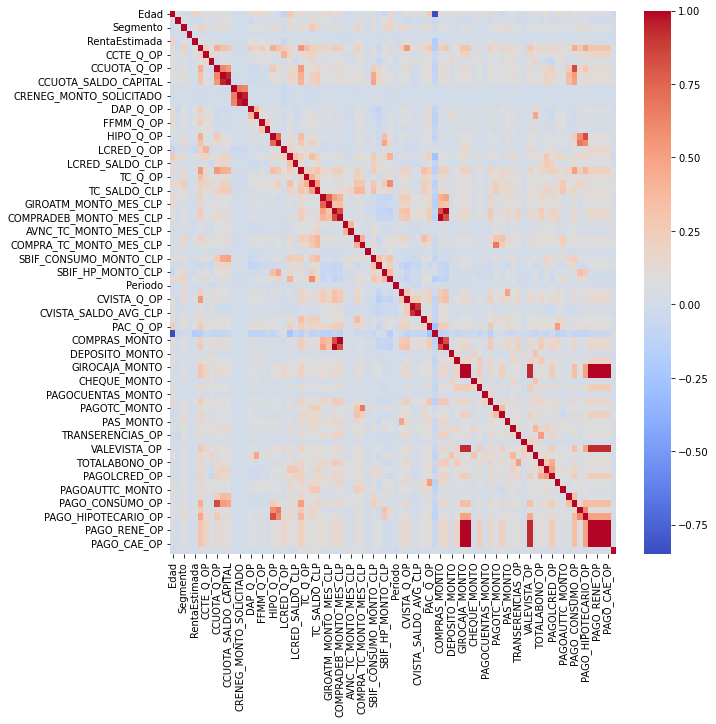

In [93]:
import seaborn as sns
corr = merged_dfs_concat.fillna(-1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()


In [94]:
corr

,Edad,SexoId,Segmento,RentaAltamira,RentaEstimada,Q_Prods,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,CCUOTA_MONTO_SOLICITADO,...,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP,flag_aumento
Edad,1.000000,0.066009,-0.014880,0.005641,0.193470,0.127366,0.061161,0.098715,0.085607,0.090439,...,0.095336,0.032957,0.069294,0.050014,0.060001,0.043861,0.043861,0.043861,0.043861,-0.036368
SexoId,0.066009,1.000000,0.046367,0.001997,-0.007213,-0.013334,0.045465,0.031641,0.041624,0.063821,...,0.034230,0.026223,0.030952,0.036841,0.024701,-0.005820,-0.005820,-0.005820,-0.005820,0.010876
Segmento,-0.014880,0.046367,1.000000,0.000961,0.087143,0.203604,0.130096,0.049585,0.095531,0.121436,...,0.067556,0.050411,0.101403,0.116950,0.137759,0.079596,0.079596,0.079596,0.079596,0.023508
RentaAltamira,0.005641,0.001997,0.000961,1.000000,-0.000714,0.001139,-0.000027,-0.000309,-0.000932,-0.000551,...,-0.000097,-0.000264,-0.000689,-0.000217,-0.000262,0.000607,0.000607,0.000607,0.000607,-0.000275
RentaEstimada,0.193470,-0.007213,0.087143,-0.000714,1.000000,0.067908,0.050294,0.031680,0.032142,0.008727,...,0.038982,0.004645,0.025240,0.037234,0.041617,0.014585,0.014585,0.014585,0.014585,-0.009506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAGO_RENE_MONTO,0.043861,-0.005820,0.079596,0.000607,0.014585,0.304167,0.183583,0.050667,0.130418,0.107212,...,0.045756,0.051841,0.342739,0.081415,0.495964,1.000000,1.000000,1.000000,1.000000,0.026527
PAGO_RENE_OP,0.043861,-0.005820,0.079596,0.000607,0.014585,0.304167,0.183583,0.050667,0.130418,0.107212,...,0.045756,0.051841,0.342739,0.081415,0.495964,1.000000,1.000000,1.000000,1.000000,0.026527
PAGO_CAE_MONTO,0.043861,-0.005820,0.079596,0.000607,0.014585,0.304167,0.183583,0.050667,0.130418,0.107212,...,0.045756,0.051841,0.342739,0.081415,0.495964,1.000000,1.000000,1.000000,1.000000,0.026527
PAGO_CAE_OP,0.043861,-0.005820,0.079596,0.000607,0.014585,0.304167,0.183583,0.050667,0.130418,0.107212,...,0.045756,0.051841,0.342739,0.081415,0.495964,1.000000,1.000000,1.000000,1.000000,0.026527


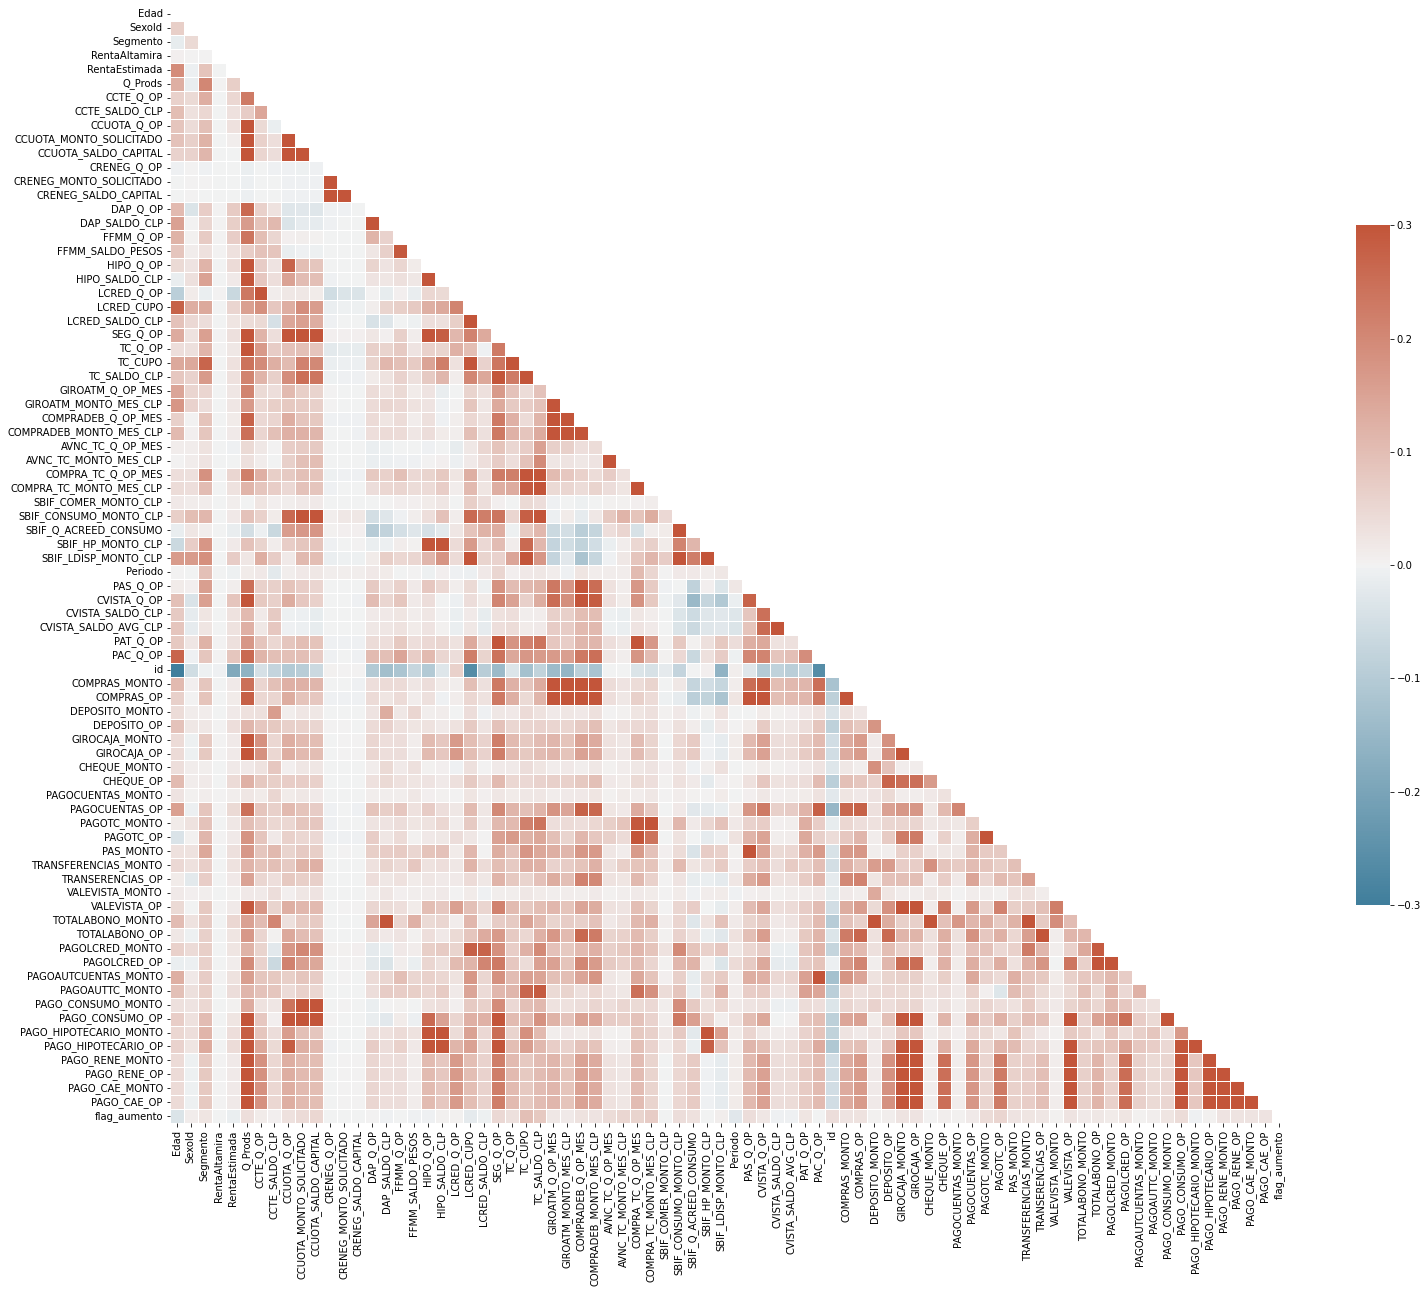

In [97]:
import seaborn as sns
corr = merged_dfs_concat.fillna(-1).corr()

plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [105]:
#get best corr
best_corrs =  corr['flag_aumento'].sort_values(ascending=False).head(20)
best_corrs.index

Index(['flag_aumento', 'TC_CUPO', 'TC_SALDO_CLP', 'COMPRA_TC_MONTO_MES_CLP',
       'COMPRA_TC_Q_OP_MES', 'PAGOTC_OP', 'AVNC_TC_MONTO_MES_CLP',
       'CCUOTA_SALDO_CAPITAL', 'SEG_Q_OP', 'CCUOTA_MONTO_SOLICITADO',
       'PAGO_CONSUMO_OP', 'PAGOTC_MONTO', 'AVNC_TC_Q_OP_MES', 'id',
       'SBIF_CONSUMO_MONTO_CLP', 'PAS_Q_OP', 'Q_Prods', 'TC_Q_OP',
       'CCUOTA_Q_OP', 'SBIF_Q_ACREED_CONSUMO'],
      dtype='object')

In [98]:
#get best features
best_features = feat_importances.sort_values(ascending=False).head(20).index

In [99]:
best_features

Index(['LCRED_Q_OP', 'CCTE_Q_OP', 'Periodo', 'TC_Q_OP', 'SexoId', 'Q_Prods',
       'Segmento', 'SBIF_Q_ACREED_CONSUMO', 'TC_CUPO', 'SEG_Q_OP', 'PAGOTC_OP',
       'CVISTA_Q_OP', 'TC_SALDO_CLP', 'COMPRA_TC_MONTO_MES_CLP',
       'PAGO_CONSUMO_OP', 'COMPRA_TC_Q_OP_MES', 'CCUOTA_Q_OP', 'PAGOTC_MONTO',
       'LCRED_CUPO', 'PAGOLCRED_OP'],
      dtype='object')

In [ ]:
corr_features = ['flag_aumento', 'TC_CUPO', 'TC_SALDO_CLP', 'COMPRA_TC_MONTO_MES_CLP',
       'COMPRA_TC_Q_OP_MES', 'PAGOTC_OP', 'AVNC_TC_MONTO_MES_CLP',
       'CCUOTA_SALDO_CAPITAL', 'SEG_Q_OP', 'CCUOTA_MONTO_SOLICITADO',
       'PAGO_CONSUMO_OP', 'PAGOTC_MONTO', 'AVNC_TC_Q_OP_MES', 'id',
       'SBIF_CONSUMO_MONTO_CLP', 'PAS_Q_OP', 'Q_Prods', 'TC_Q_OP',
       'CCUOTA_Q_OP', 'SBIF_Q_ACREED_CONSUMO']

mi_features = ['LCRED_Q_OP', 'CCTE_Q_OP', 'Periodo', 'TC_Q_OP', 'SexoId', 'Q_Prods',
       'Segmento', 'SBIF_Q_ACREED_CONSUMO', 'TC_CUPO', 'SEG_Q_OP', 'PAGOTC_OP',
       'CVISTA_Q_OP', 'TC_SALDO_CLP', 'COMPRA_TC_MONTO_MES_CLP',
       'PAGO_CONSUMO_OP', 'COMPRA_TC_Q_OP_MES', 'CCUOTA_Q_OP', 'PAGOTC_MONTO',
       'LCRED_CUPO', 'PAGOLCRED_OP']

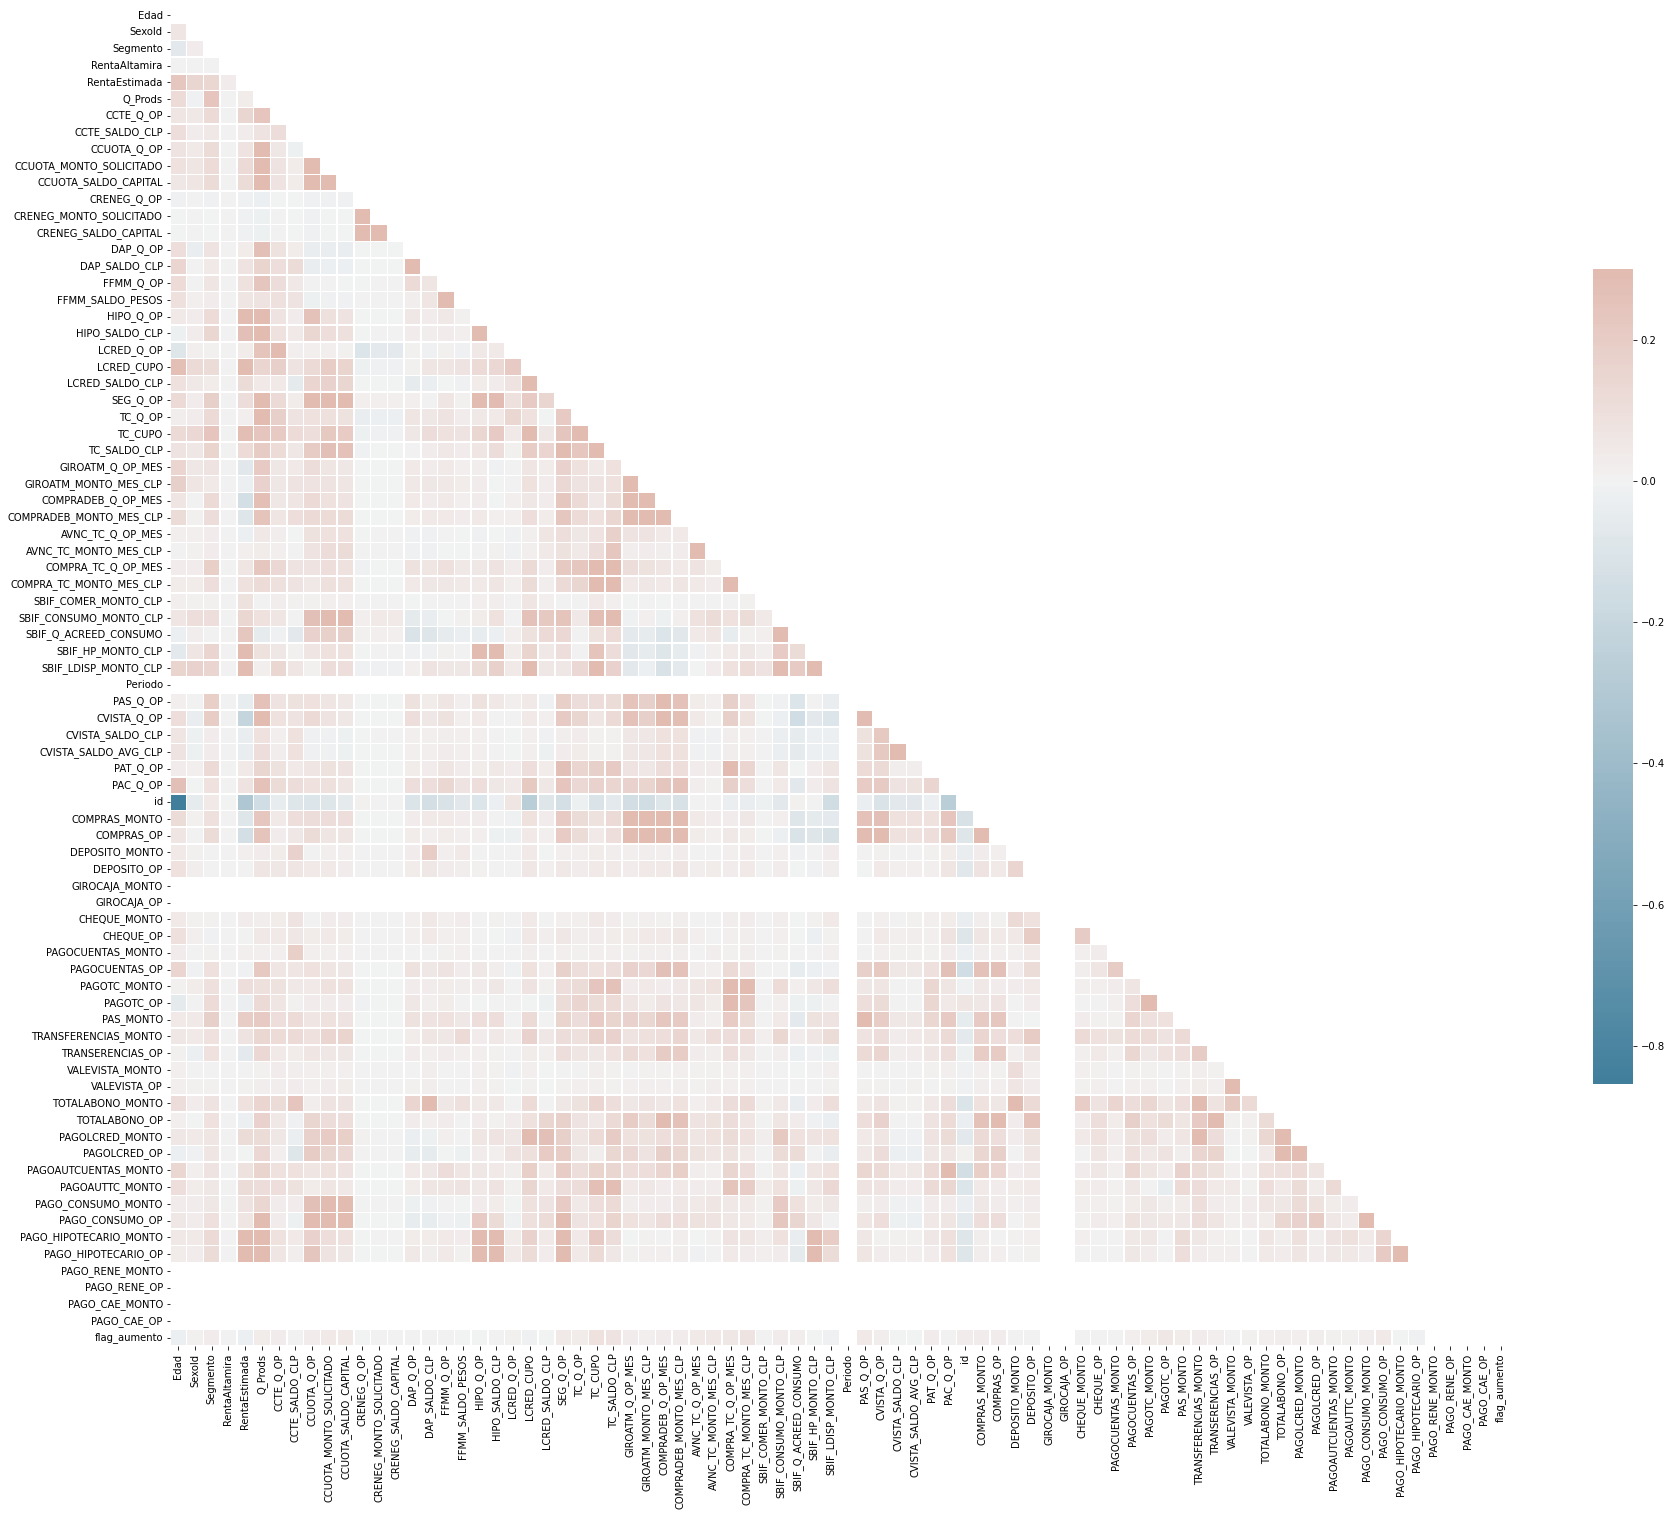

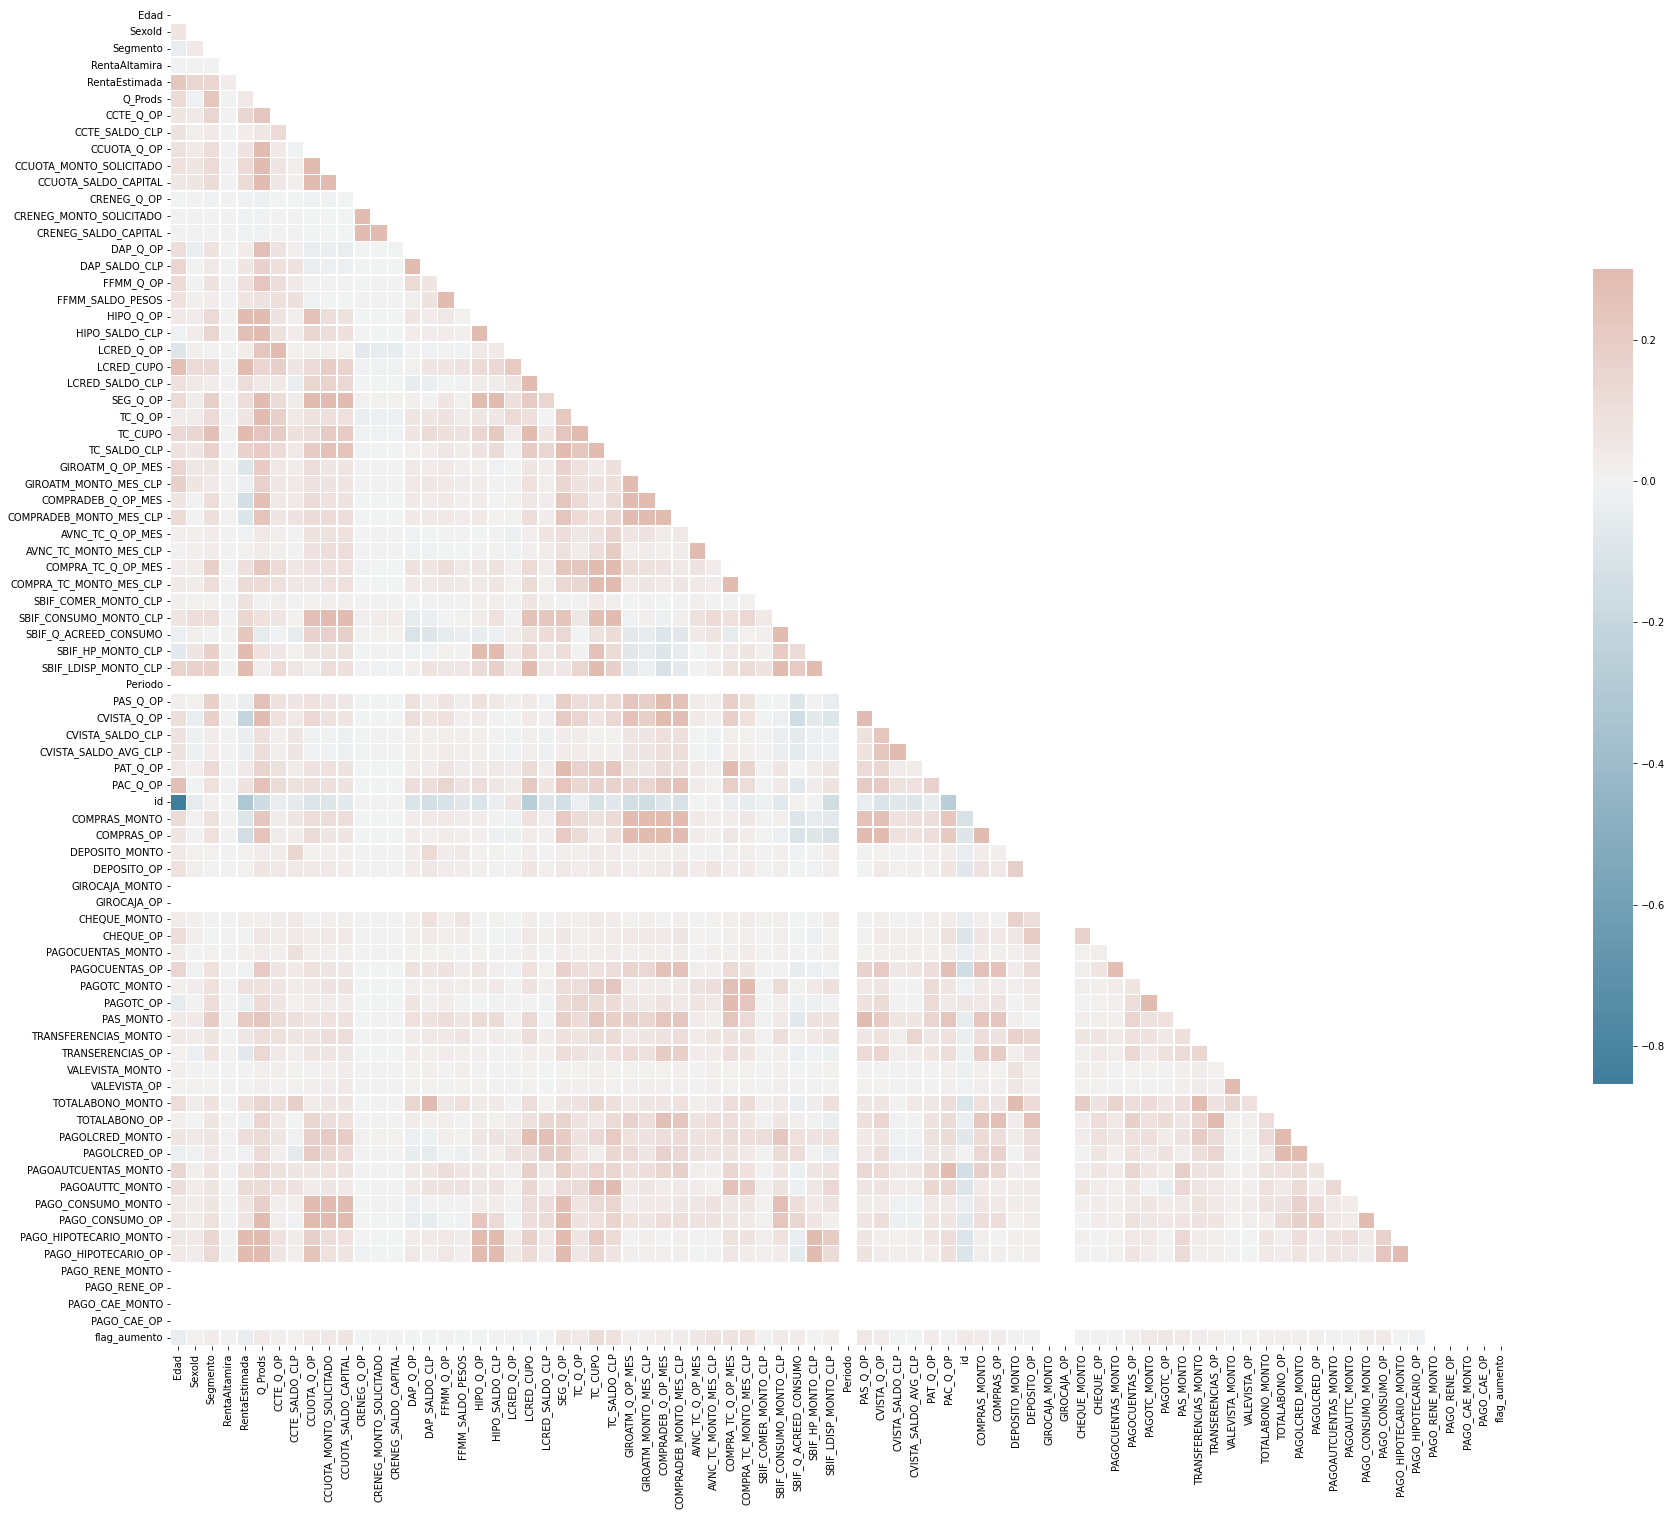

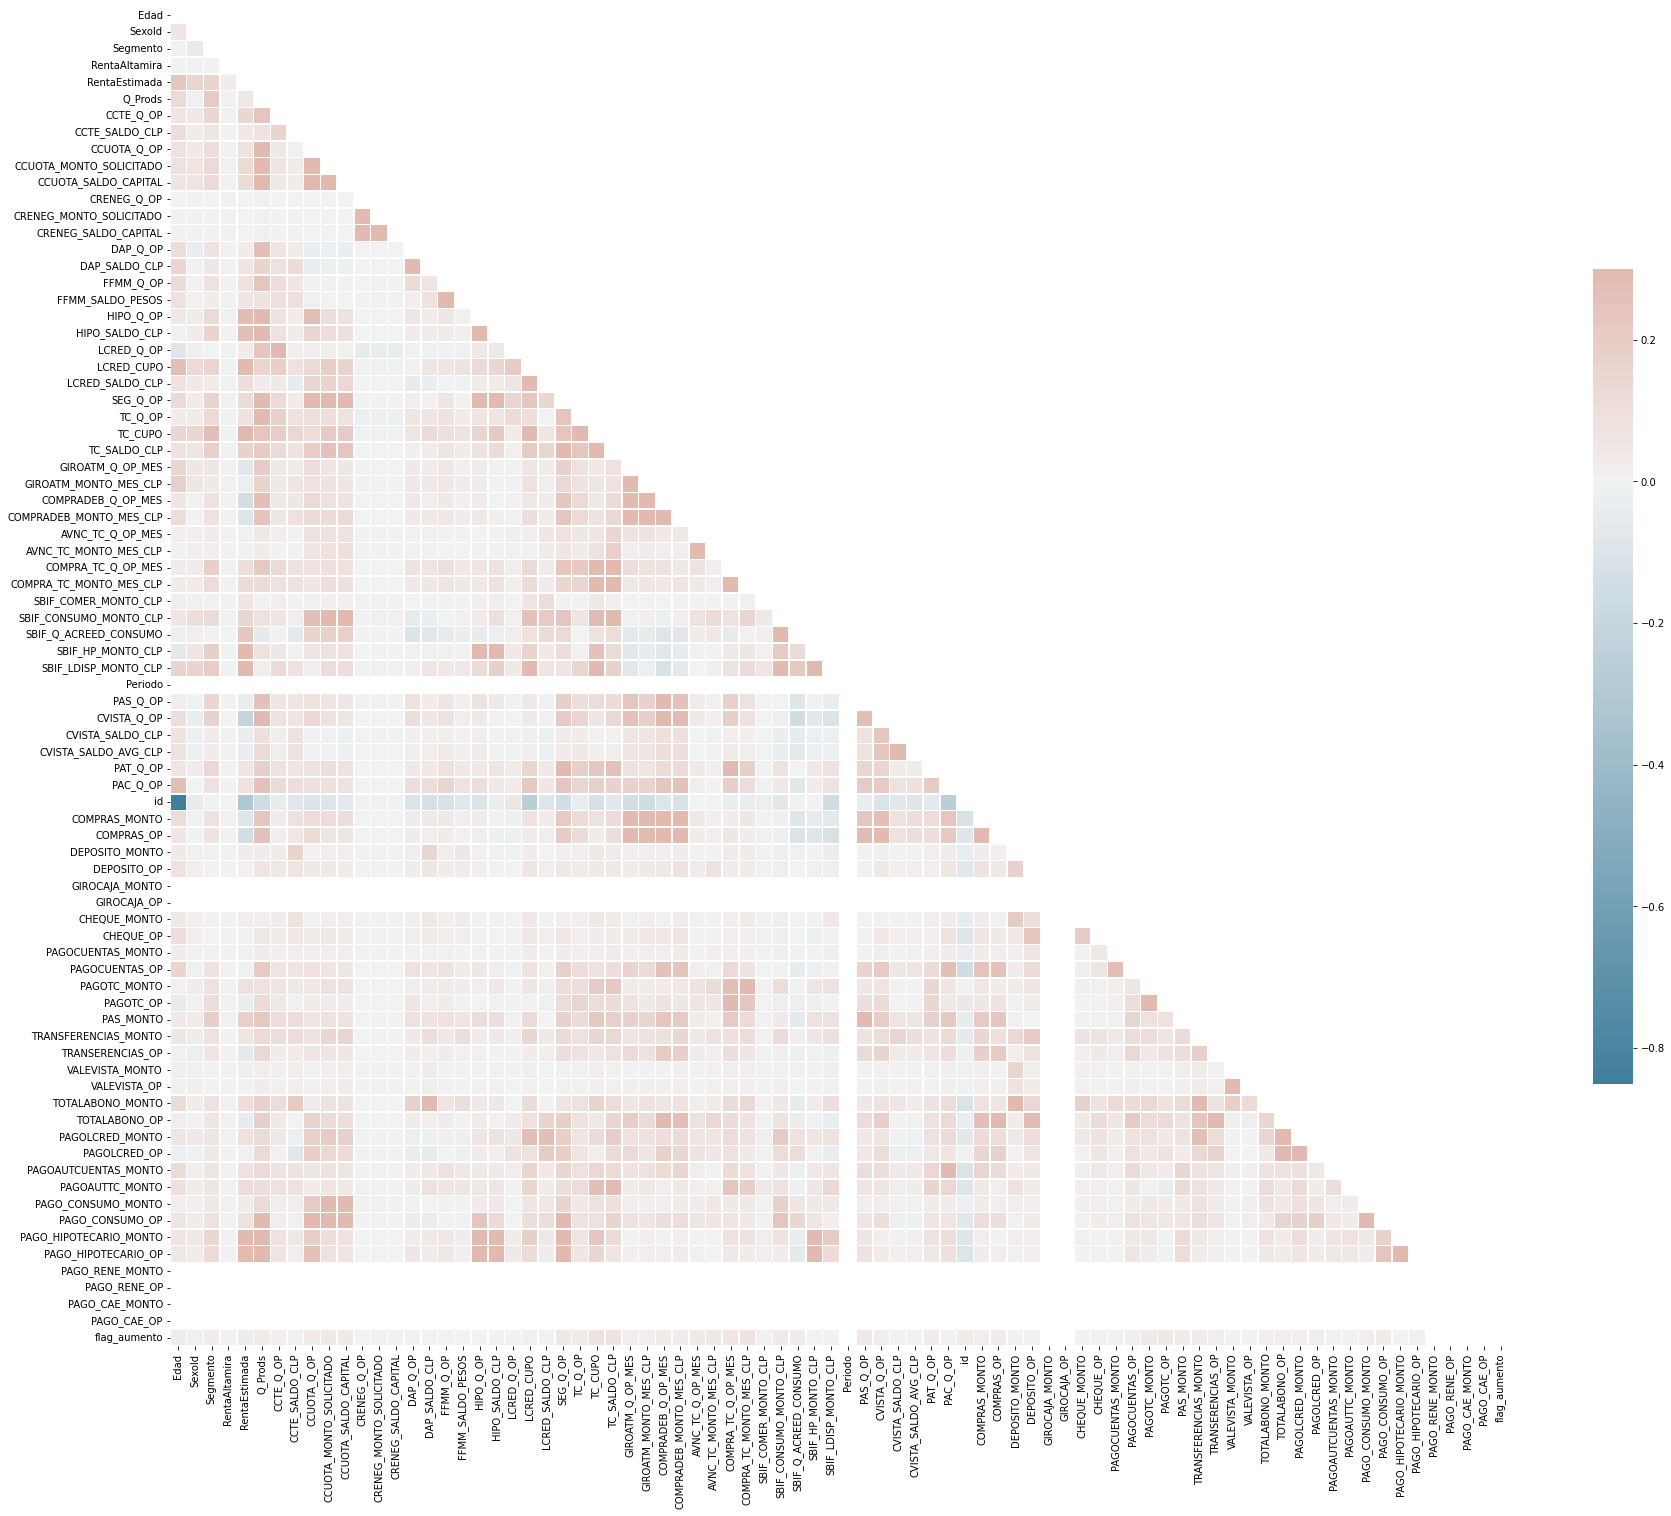

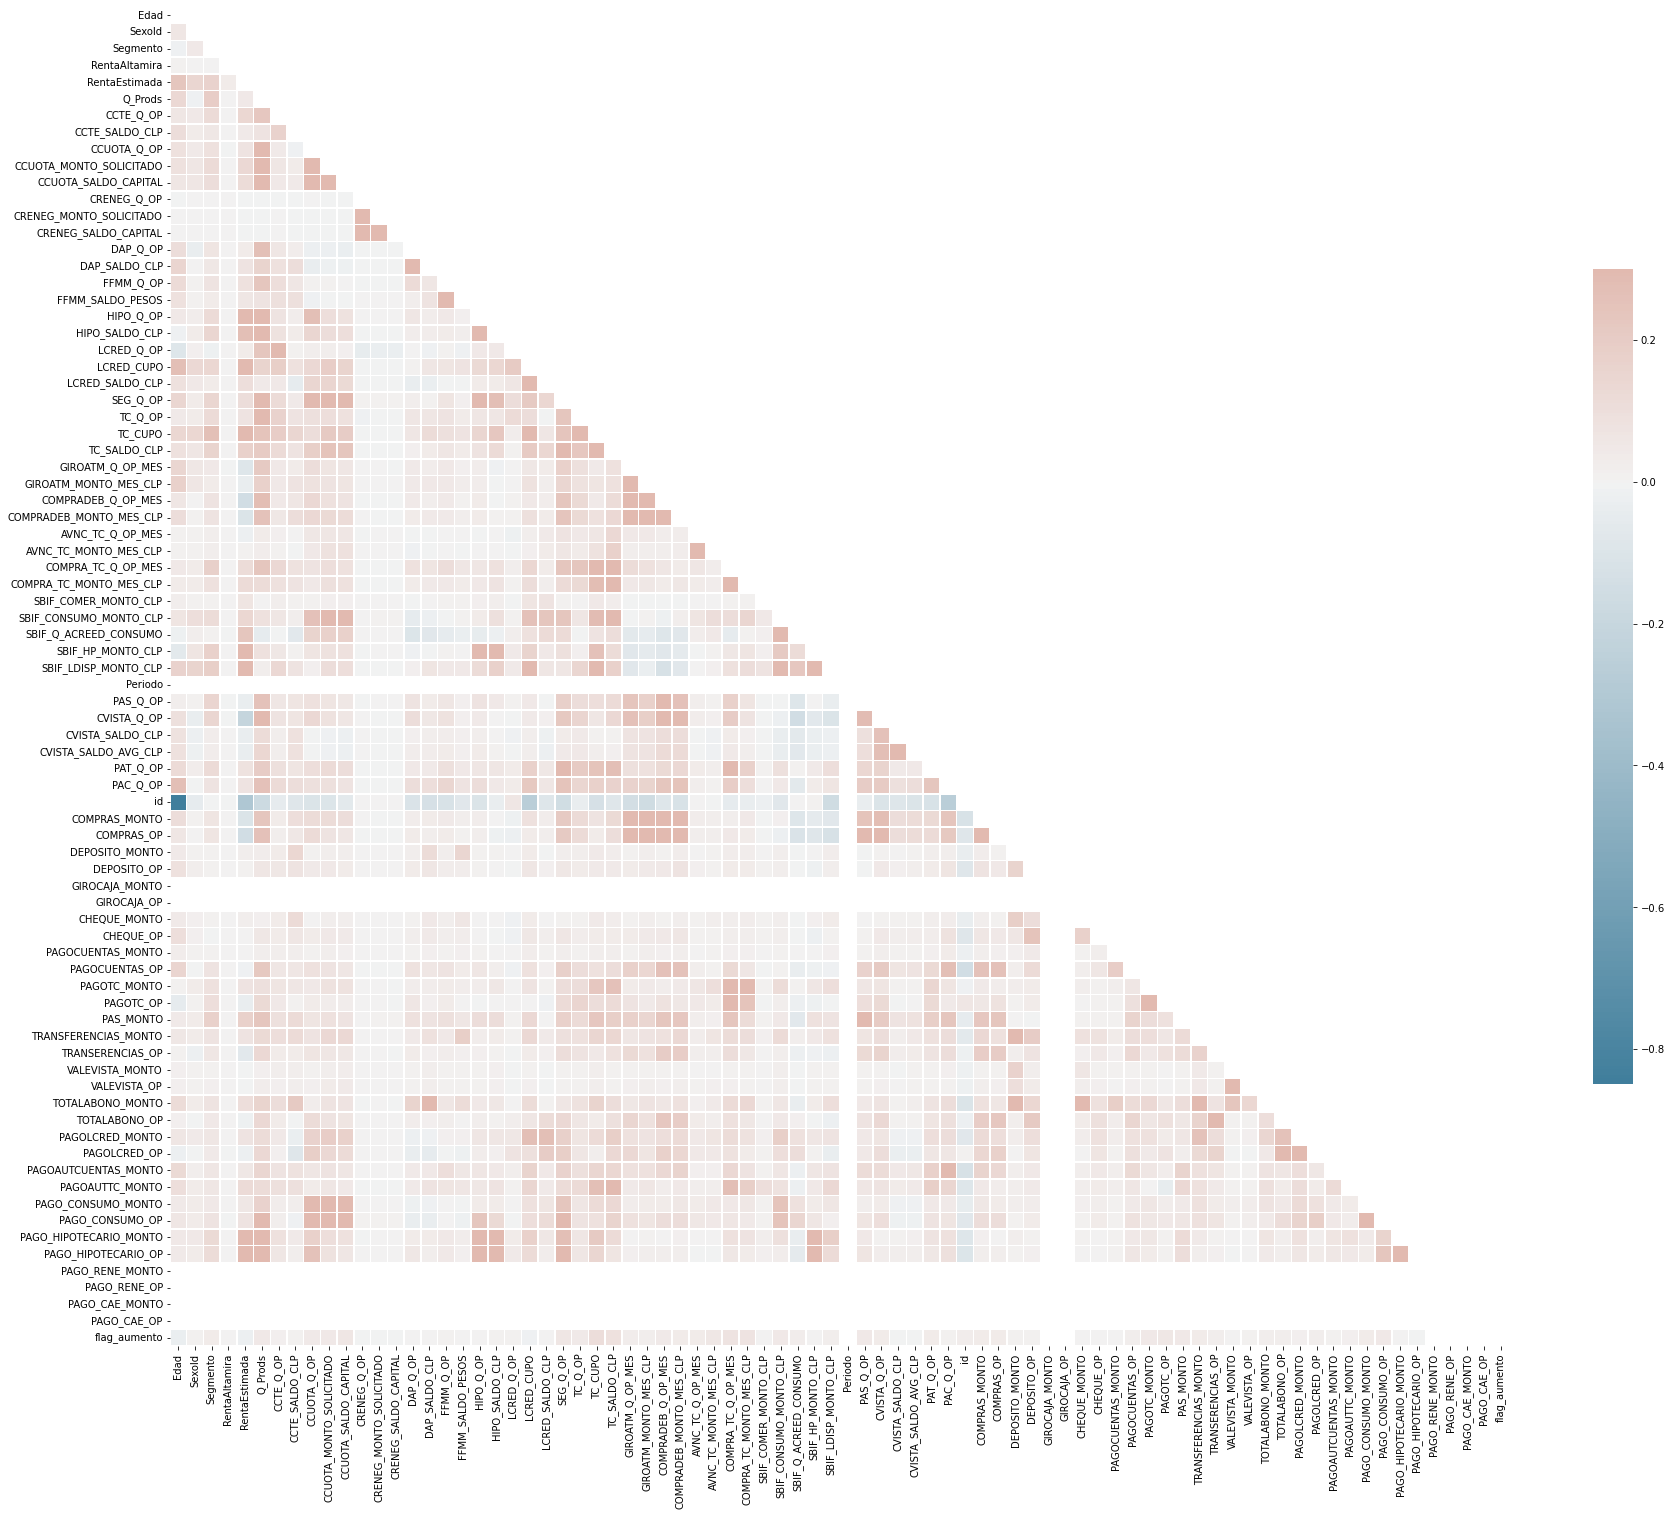

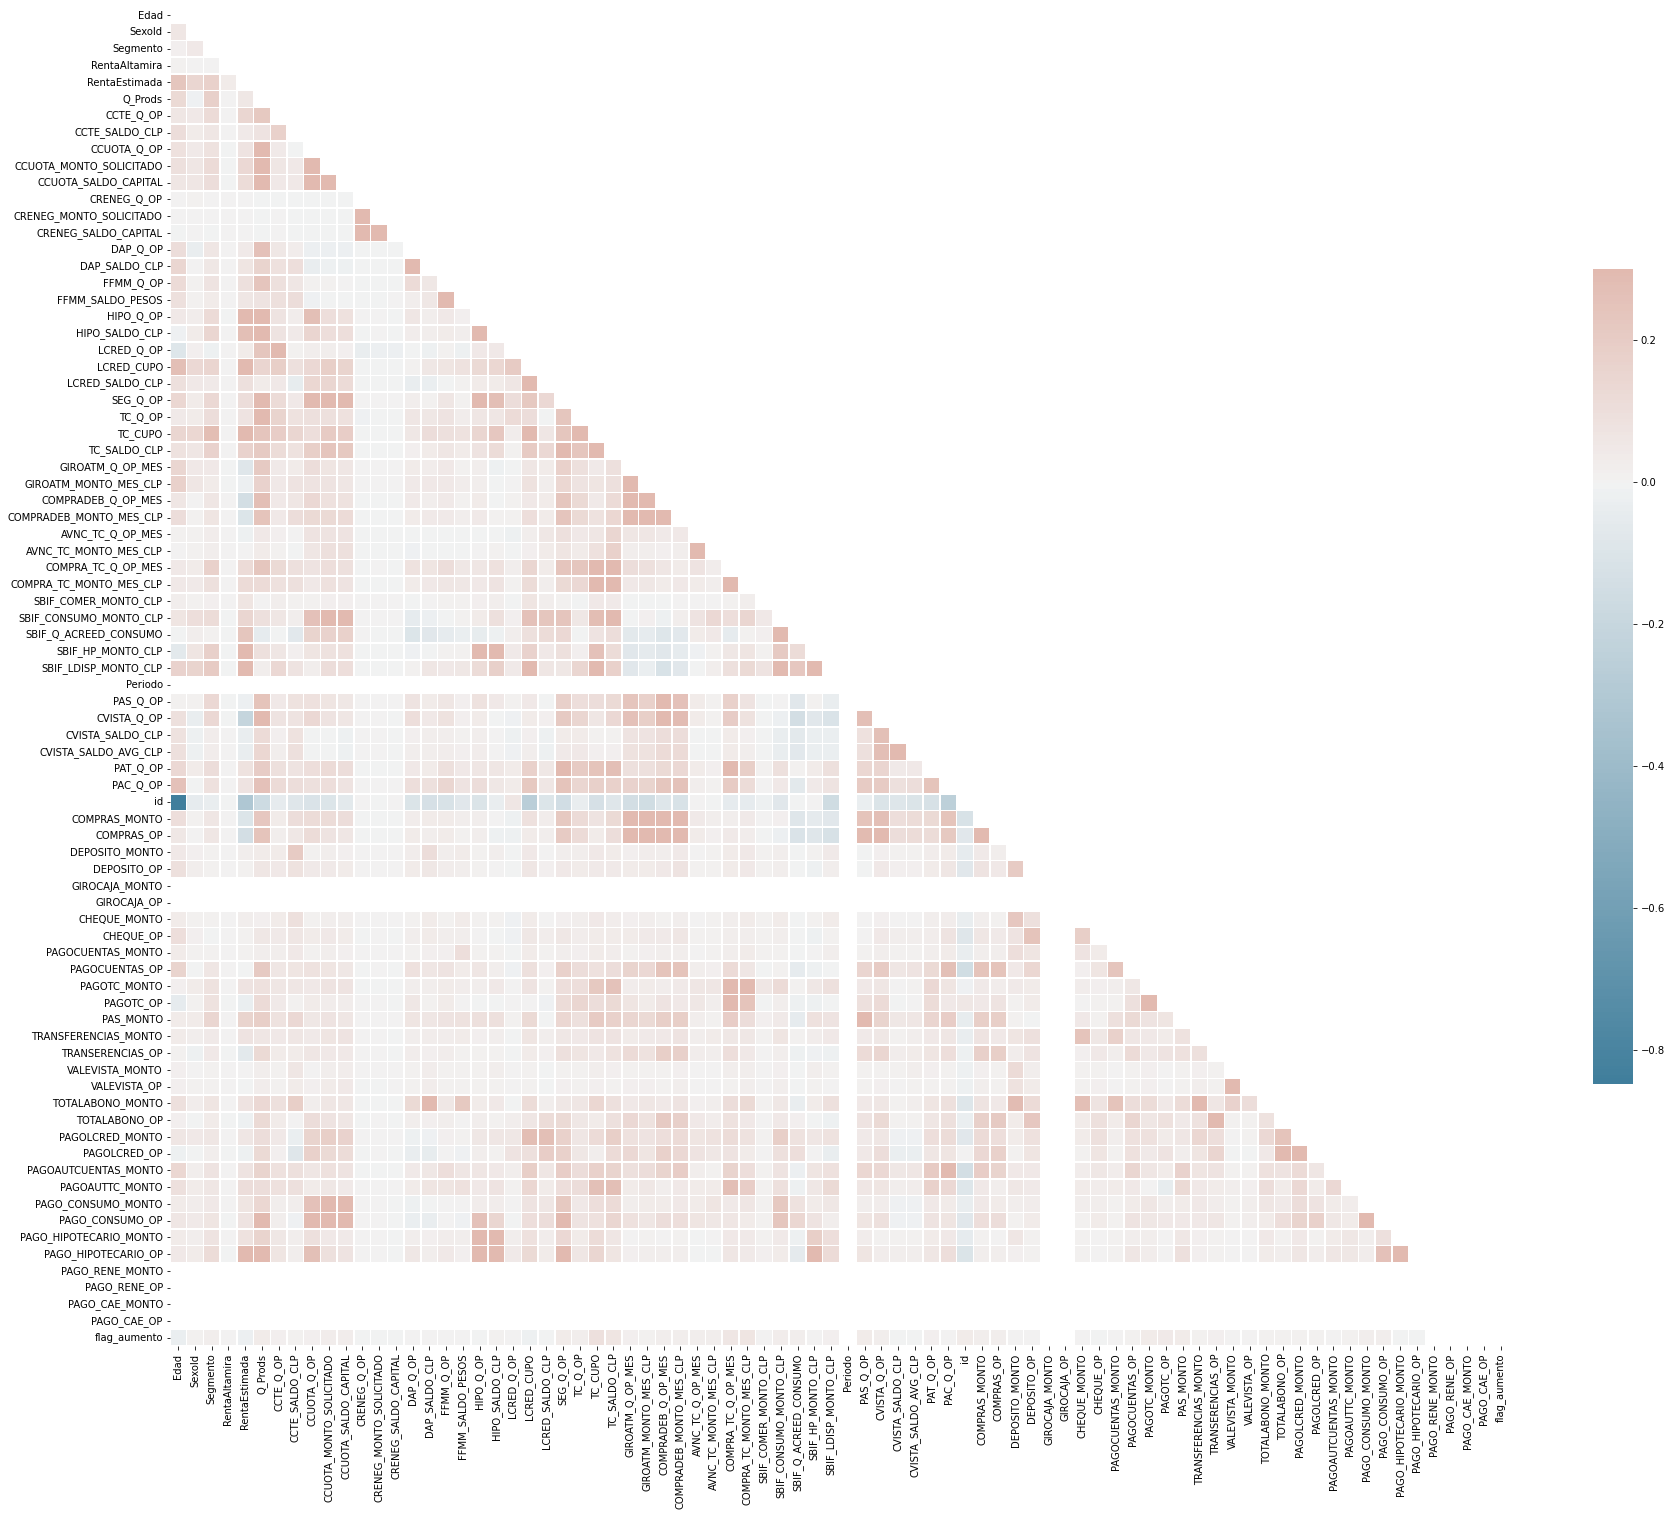

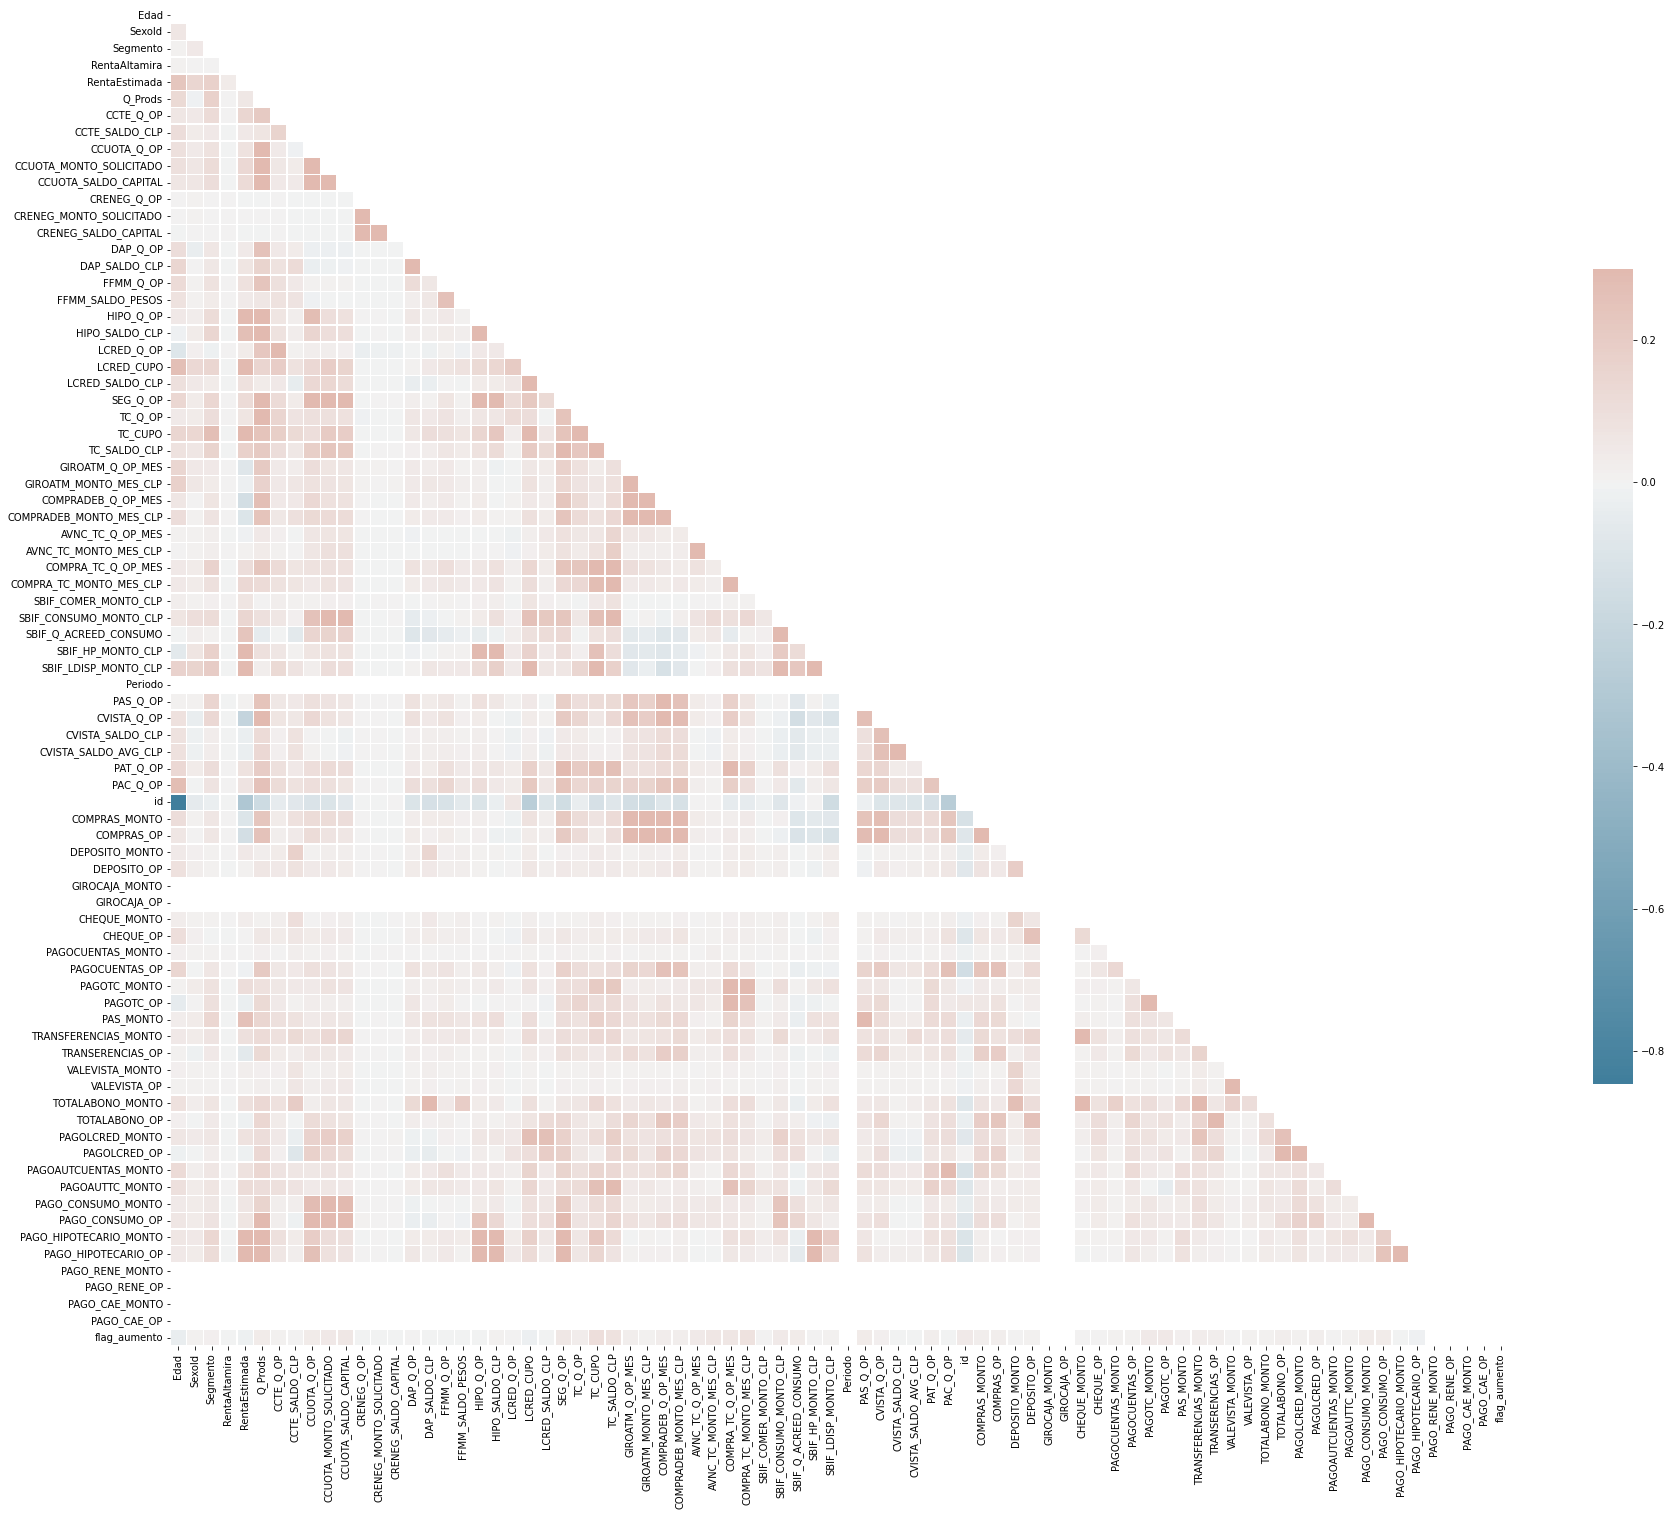

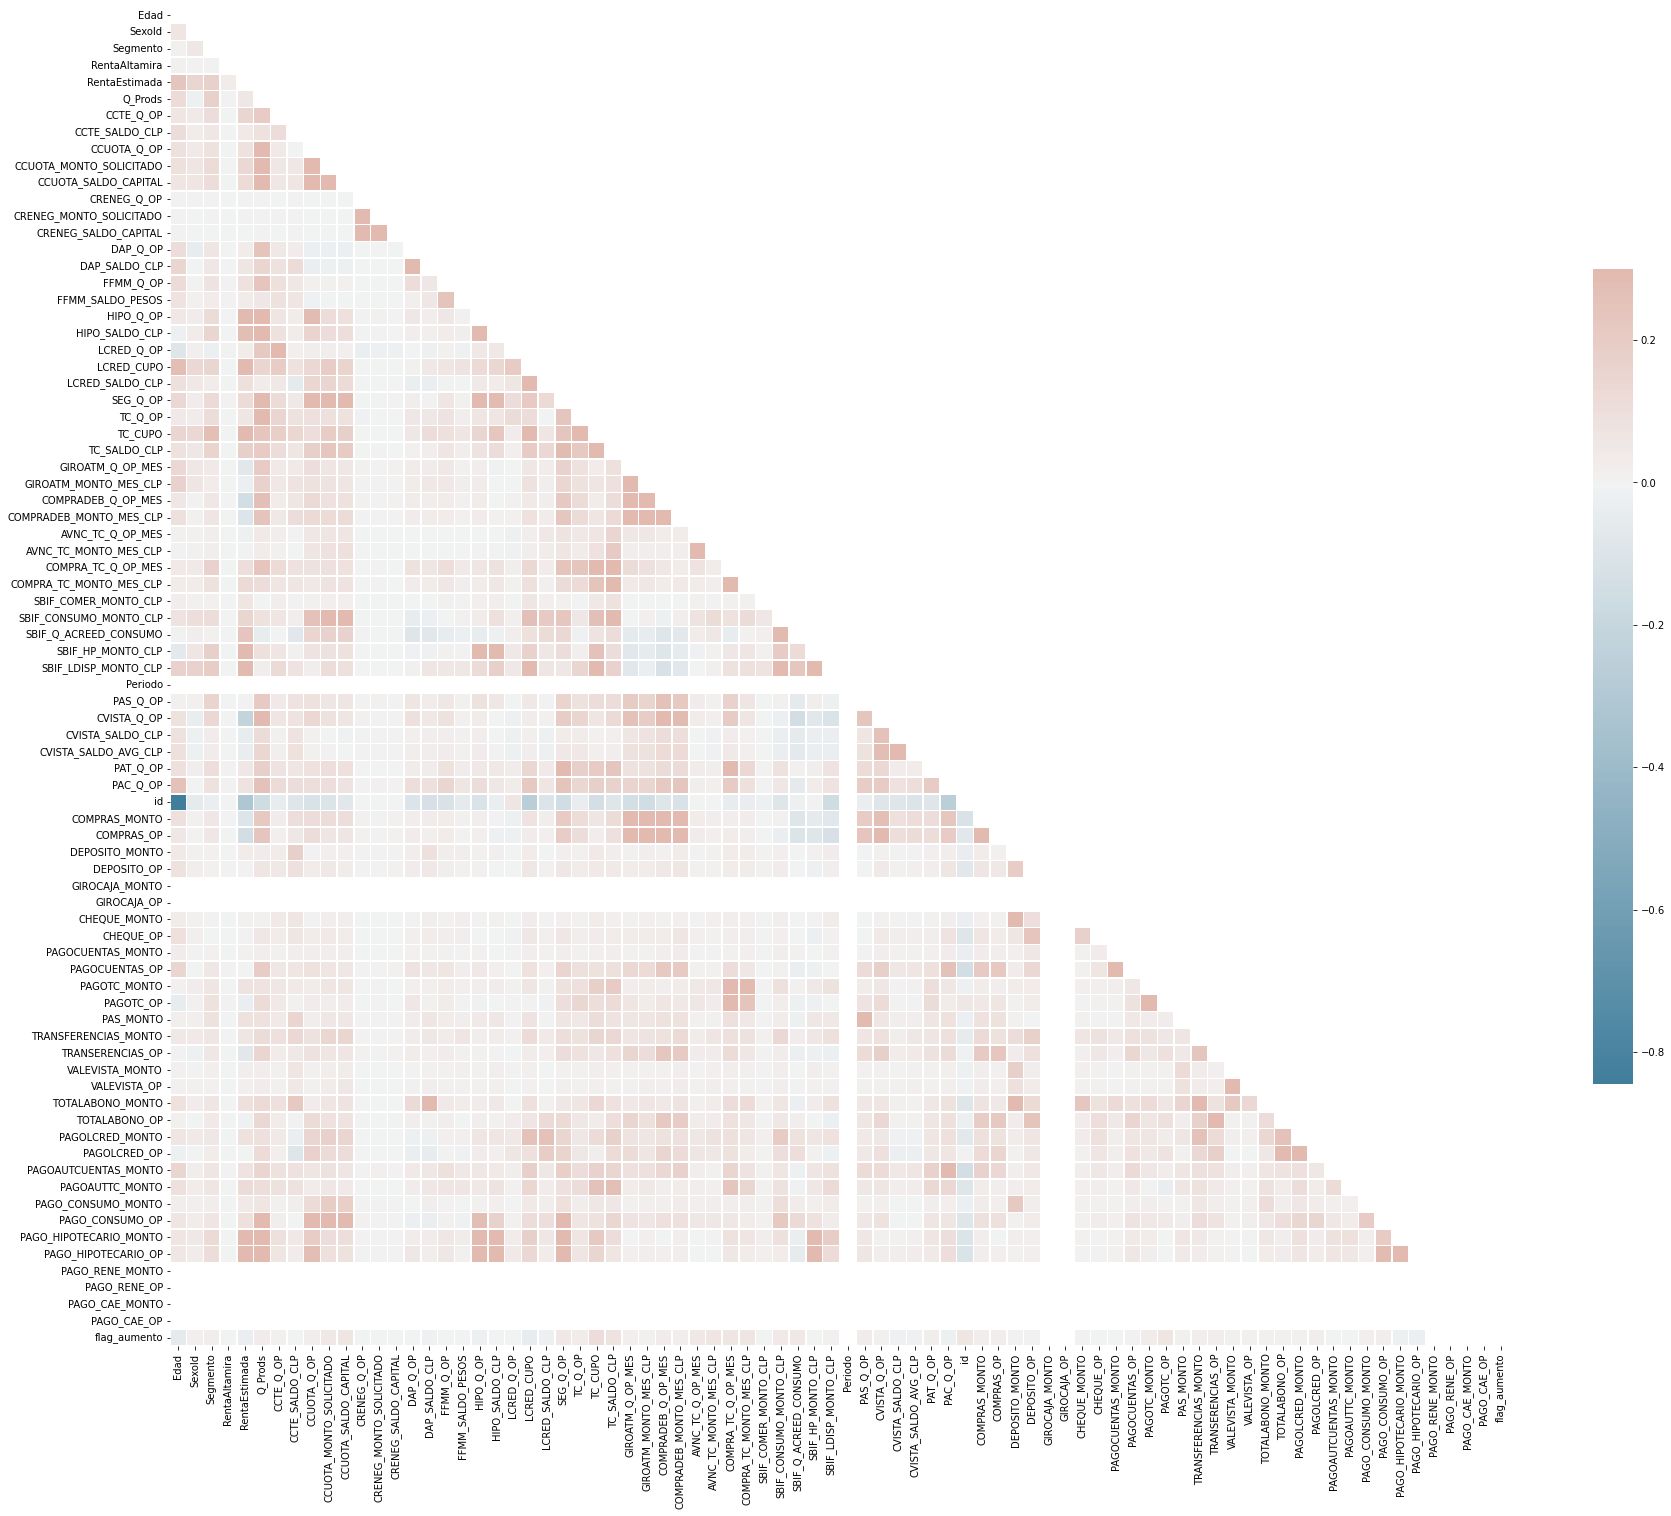

In [53]:
import seaborn as sns
corr = {}
for periodo in periodos:
  corr[periodo] = merged_dfs[periodo].copy().corr()
  plt.figure(figsize = (30,30))
  mask = np.triu(np.ones_like(corr[periodo], dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr[periodo], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
  plt.show()

In [ ]:
import seaborn as sns
for periodo in periodos:
  corr = merged_dfs[periodo].copy().corr('spearman')
  plt.figure(figsize = (30,30))
  mask = np.triu(np.ones_like(corr, dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
  plt.show()

In [66]:
(corr[202202]['flag_aumento'].sort_values()+ corr[202203]['flag_aumento'].sort_values())/2

AVNC_TC_MONTO_MES_CLP      0.061578
AVNC_TC_Q_OP_MES           0.044352
CCTE_Q_OP                  0.007792
CCTE_SALDO_CLP             0.000272
CCUOTA_MONTO_SOLICITADO    0.047920
                             ...   
TRANSFERENCIAS_MONTO       0.026906
VALEVISTA_MONTO            0.004409
VALEVISTA_OP               0.005981
flag_aumento               1.000000
id                         0.054020
Name: flag_aumento, Length: 80, dtype: float64

In [72]:
list(corr.keys())

[202208, 202207, 202206, 202205, 202204, 202203, 202202]

In [85]:
mean = corr[202202]['flag_aumento'].sort_values()

for key in list(corr.keys())[1:]:
  mean += corr[key]['flag_aumento'].sort_values()


mean = mean/(len(list(corr.keys())))

In [94]:
abs(mean).sort_values()

RentaAltamira           0.000294
DAP_Q_OP                0.000406
SBIF_COMER_MONTO_CLP    0.000445
CHEQUE_OP               0.000480
CRENEG_SALDO_CAPITAL    0.001026
                          ...   
GIROCAJA_OP                  NaN
PAGO_RENE_MONTO              NaN
PAGO_RENE_OP                 NaN
PAGO_CAE_MONTO               NaN
PAGO_CAE_OP                  NaN
Name: flag_aumento, Length: 80, dtype: float64

In [96]:
d = abs(mean).sort_values()
for key in d.keys():
  print(key, ': ', d[key] )

RentaAltamira :  0.00029358571840640464
DAP_Q_OP :  0.0004063409589783731
SBIF_COMER_MONTO_CLP :  0.00044485301354435606
CHEQUE_OP :  0.00047969137964777966
CRENEG_SALDO_CAPITAL :  0.001026122625104862
CRENEG_MONTO_SOLICITADO :  0.0010835104723091109
SBIF_HP_MONTO_CLP :  0.001085745764964693
PAGOAUTCUENTAS_MONTO :  0.0011342605168633546
FFMM_Q_OP :  0.0015638062533704707
CHEQUE_MONTO :  0.0015954840080044258
CRENEG_Q_OP :  0.0016242598682500047
PAGOCUENTAS_MONTO :  0.0017037803908653544
LCRED_Q_OP :  0.0018558453671784728
DEPOSITO_MONTO :  0.002464337967950054
DEPOSITO_OP :  0.0029153726228077167
FFMM_SALDO_PESOS :  0.003150704448547186
HIPO_SALDO_CLP :  0.0036527957254079237
VALEVISTA_MONTO :  0.003965323422554826
CCTE_SALDO_CLP :  0.0041012868806324584
PAC_Q_OP :  0.004180861227945948
DAP_SALDO_CLP :  0.005091772358912553
CVISTA_SALDO_CLP :  0.005419719715754183
HIPO_Q_OP :  0.00551330474284873
CVISTA_SALDO_AVG_CLP :  0.00610265206476041
VALEVISTA_OP :  0.006185089371291376
LCRED_SAL

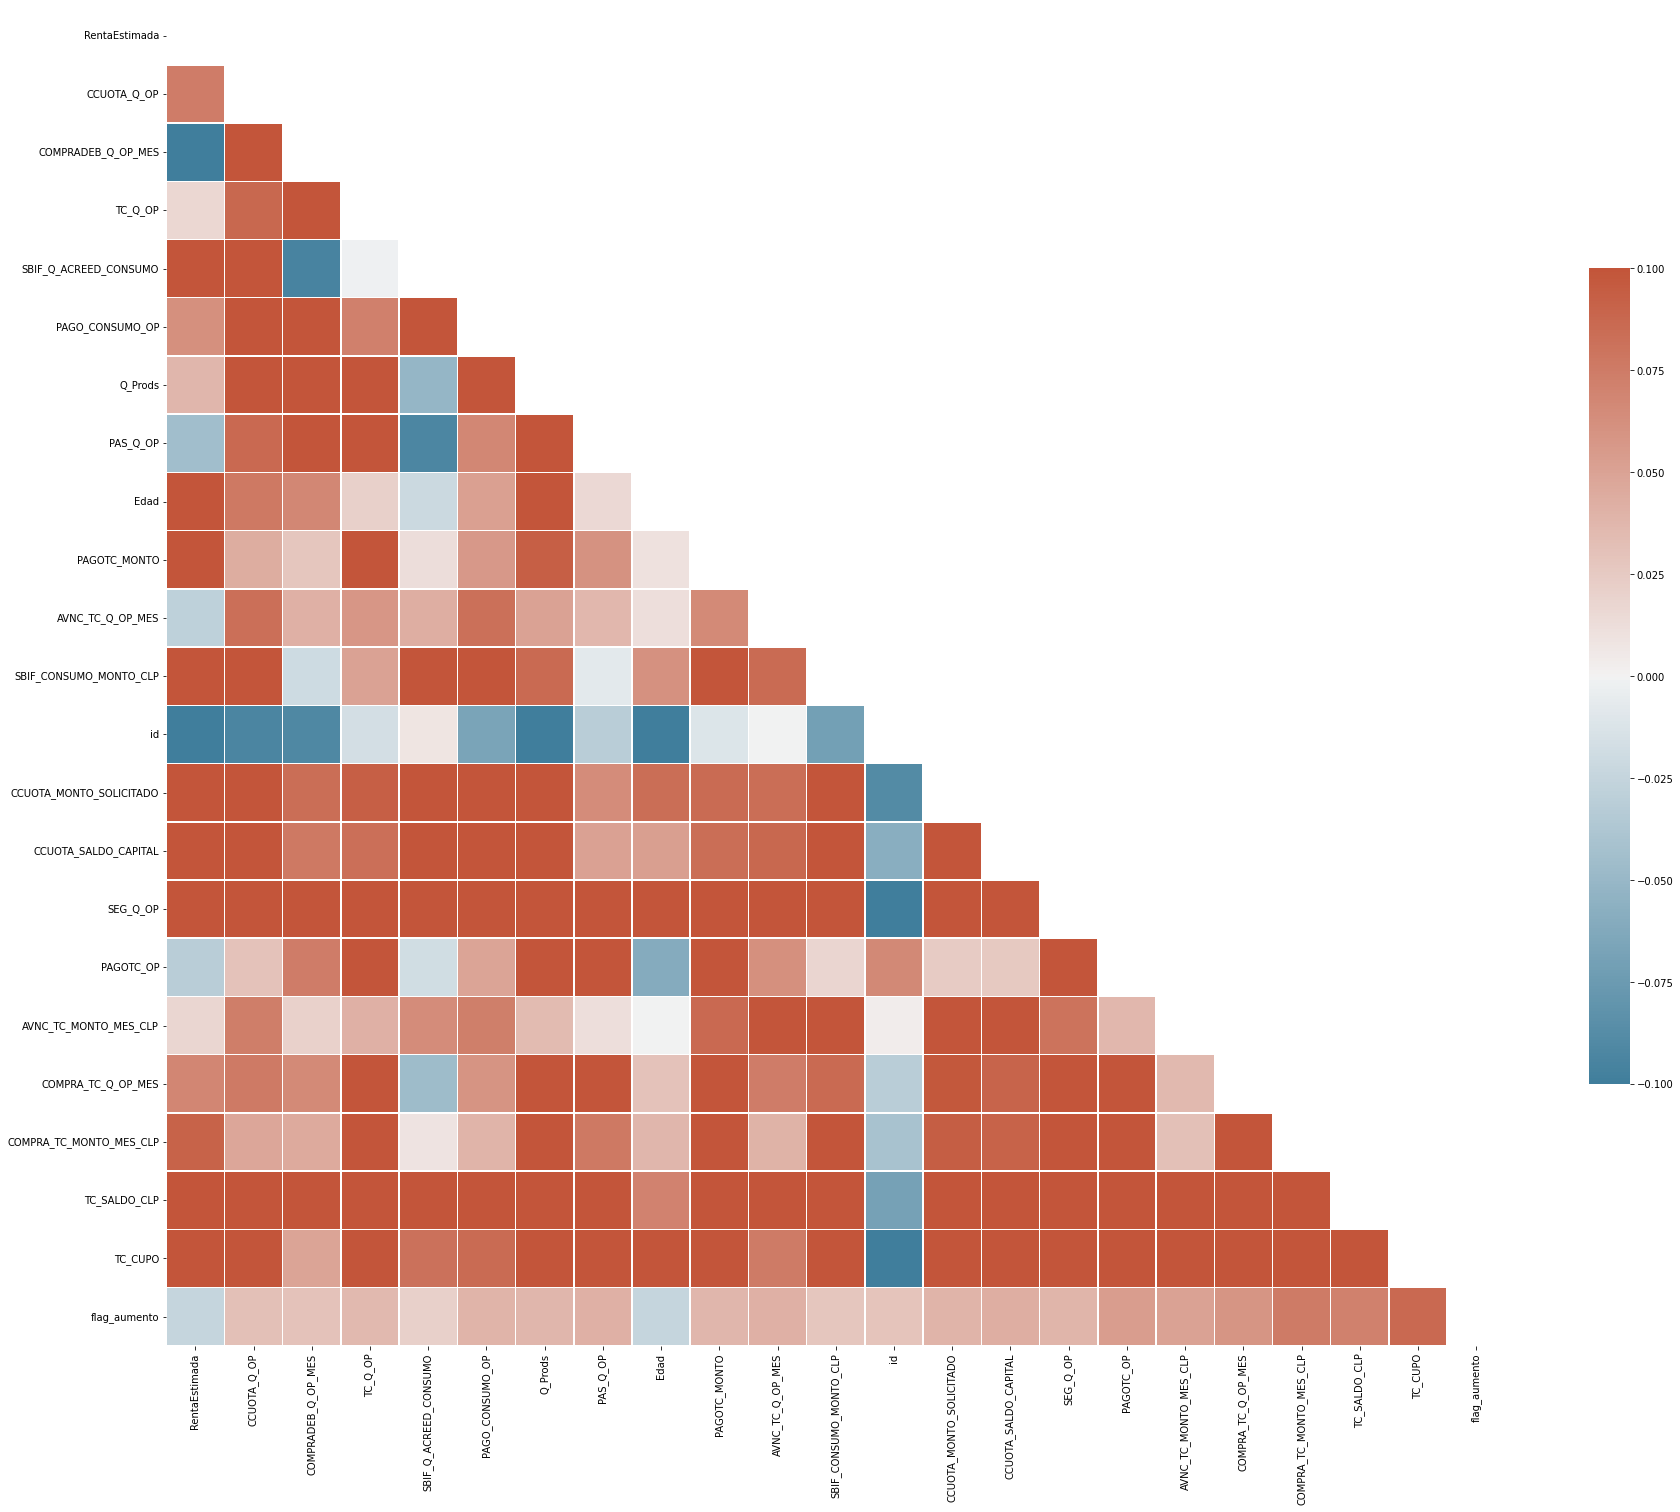

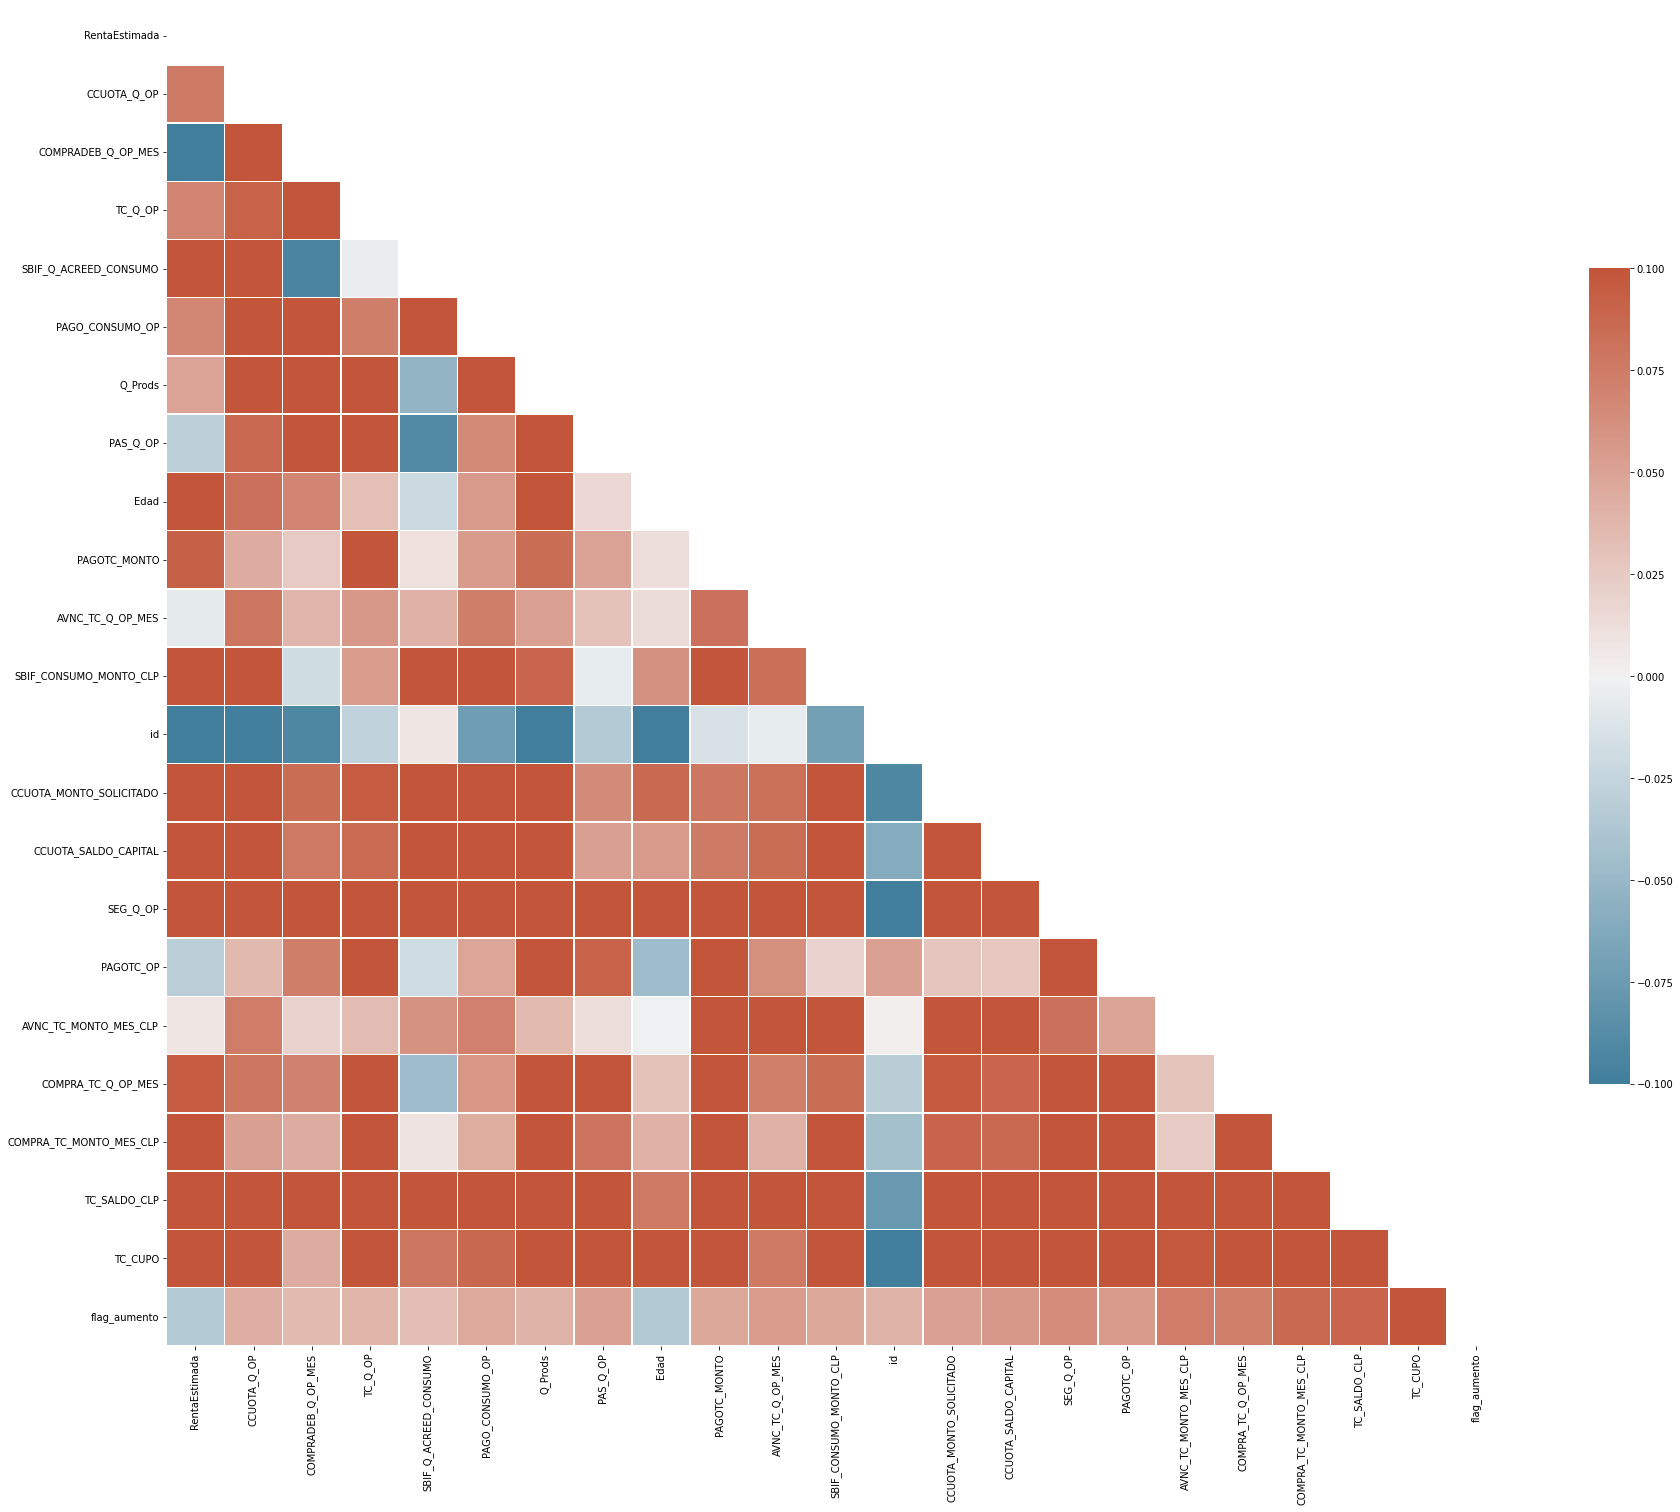

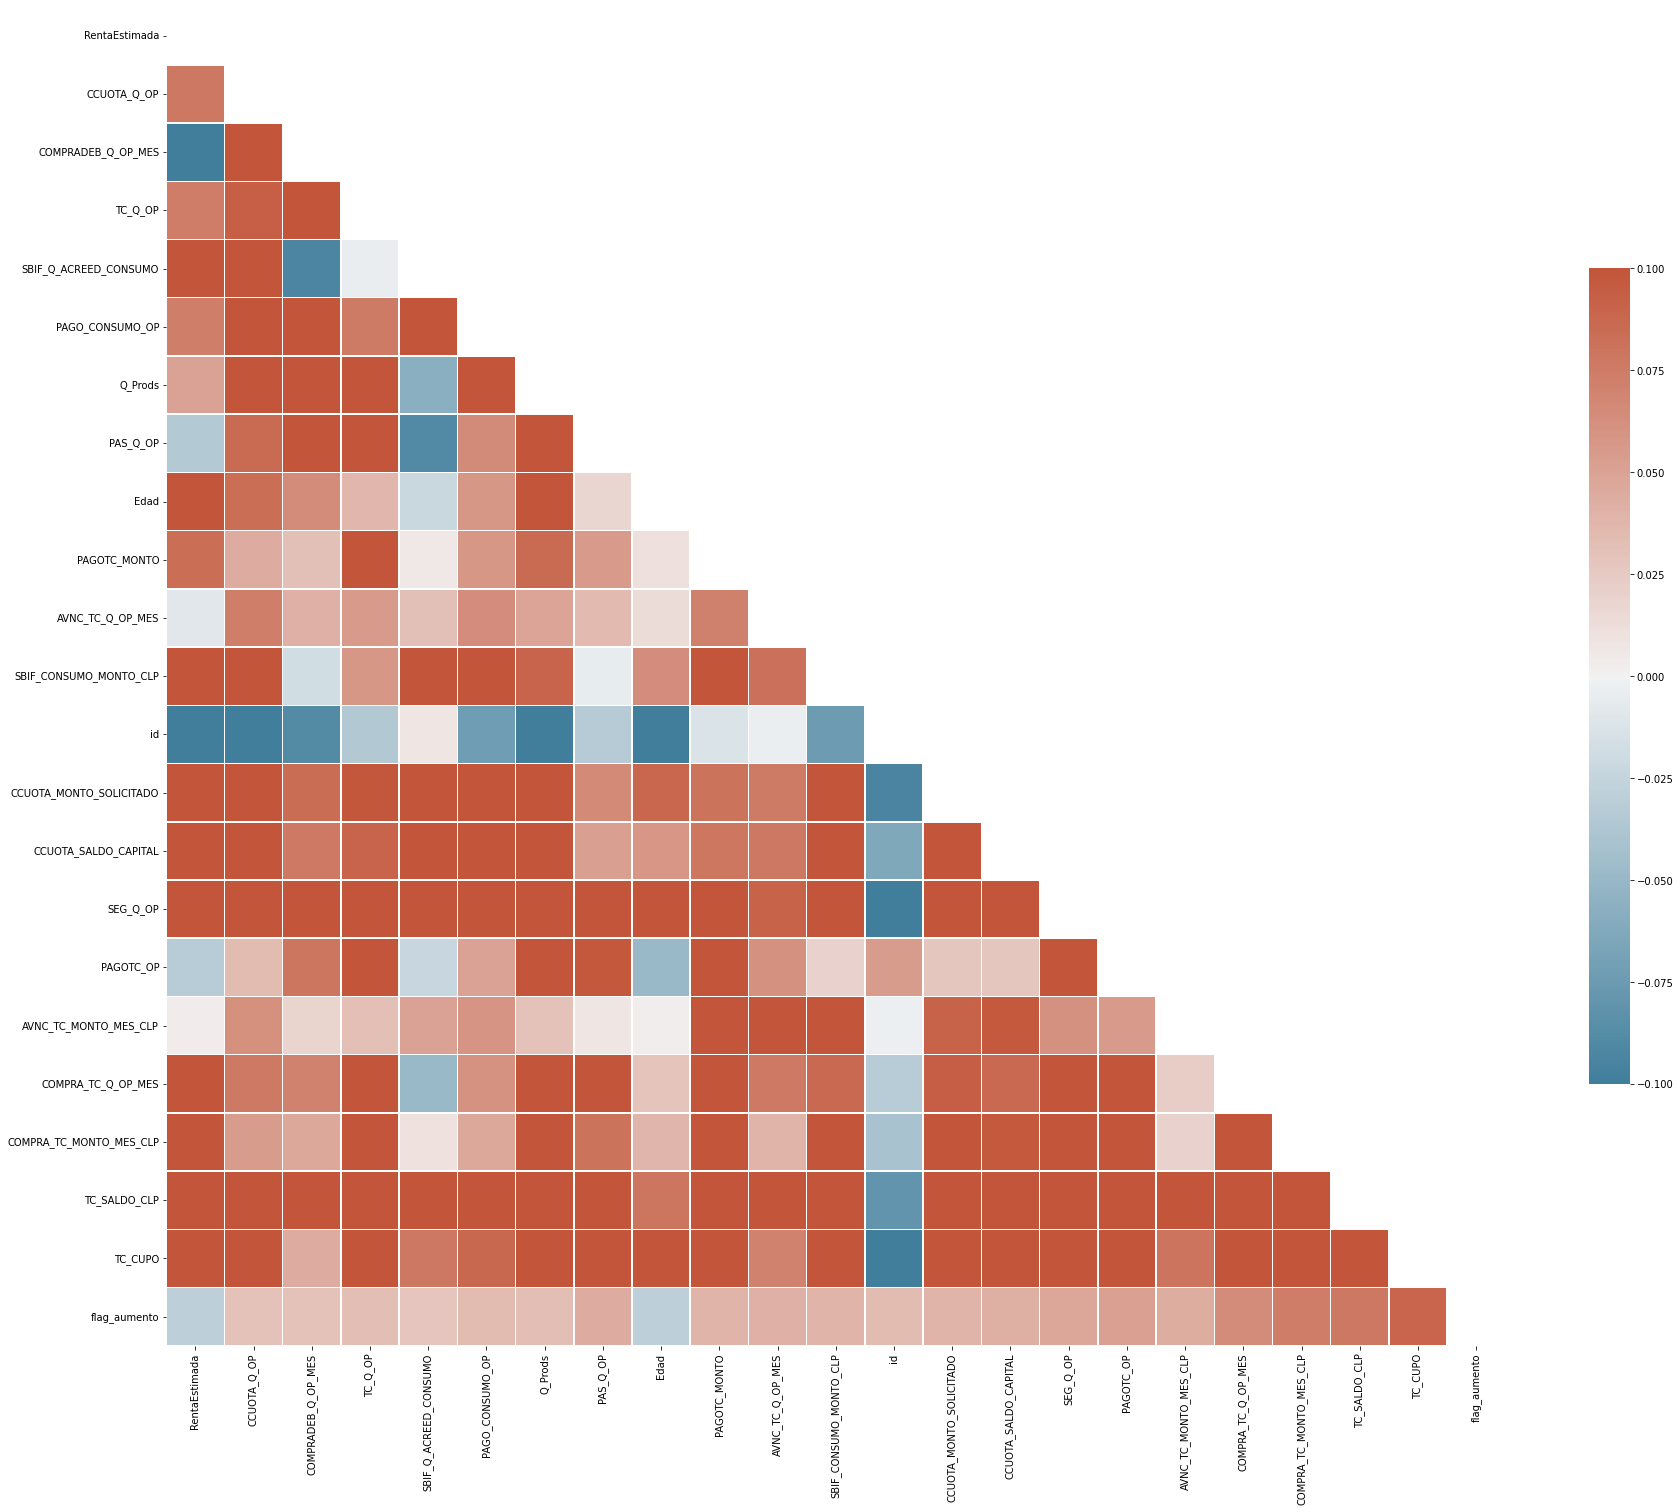

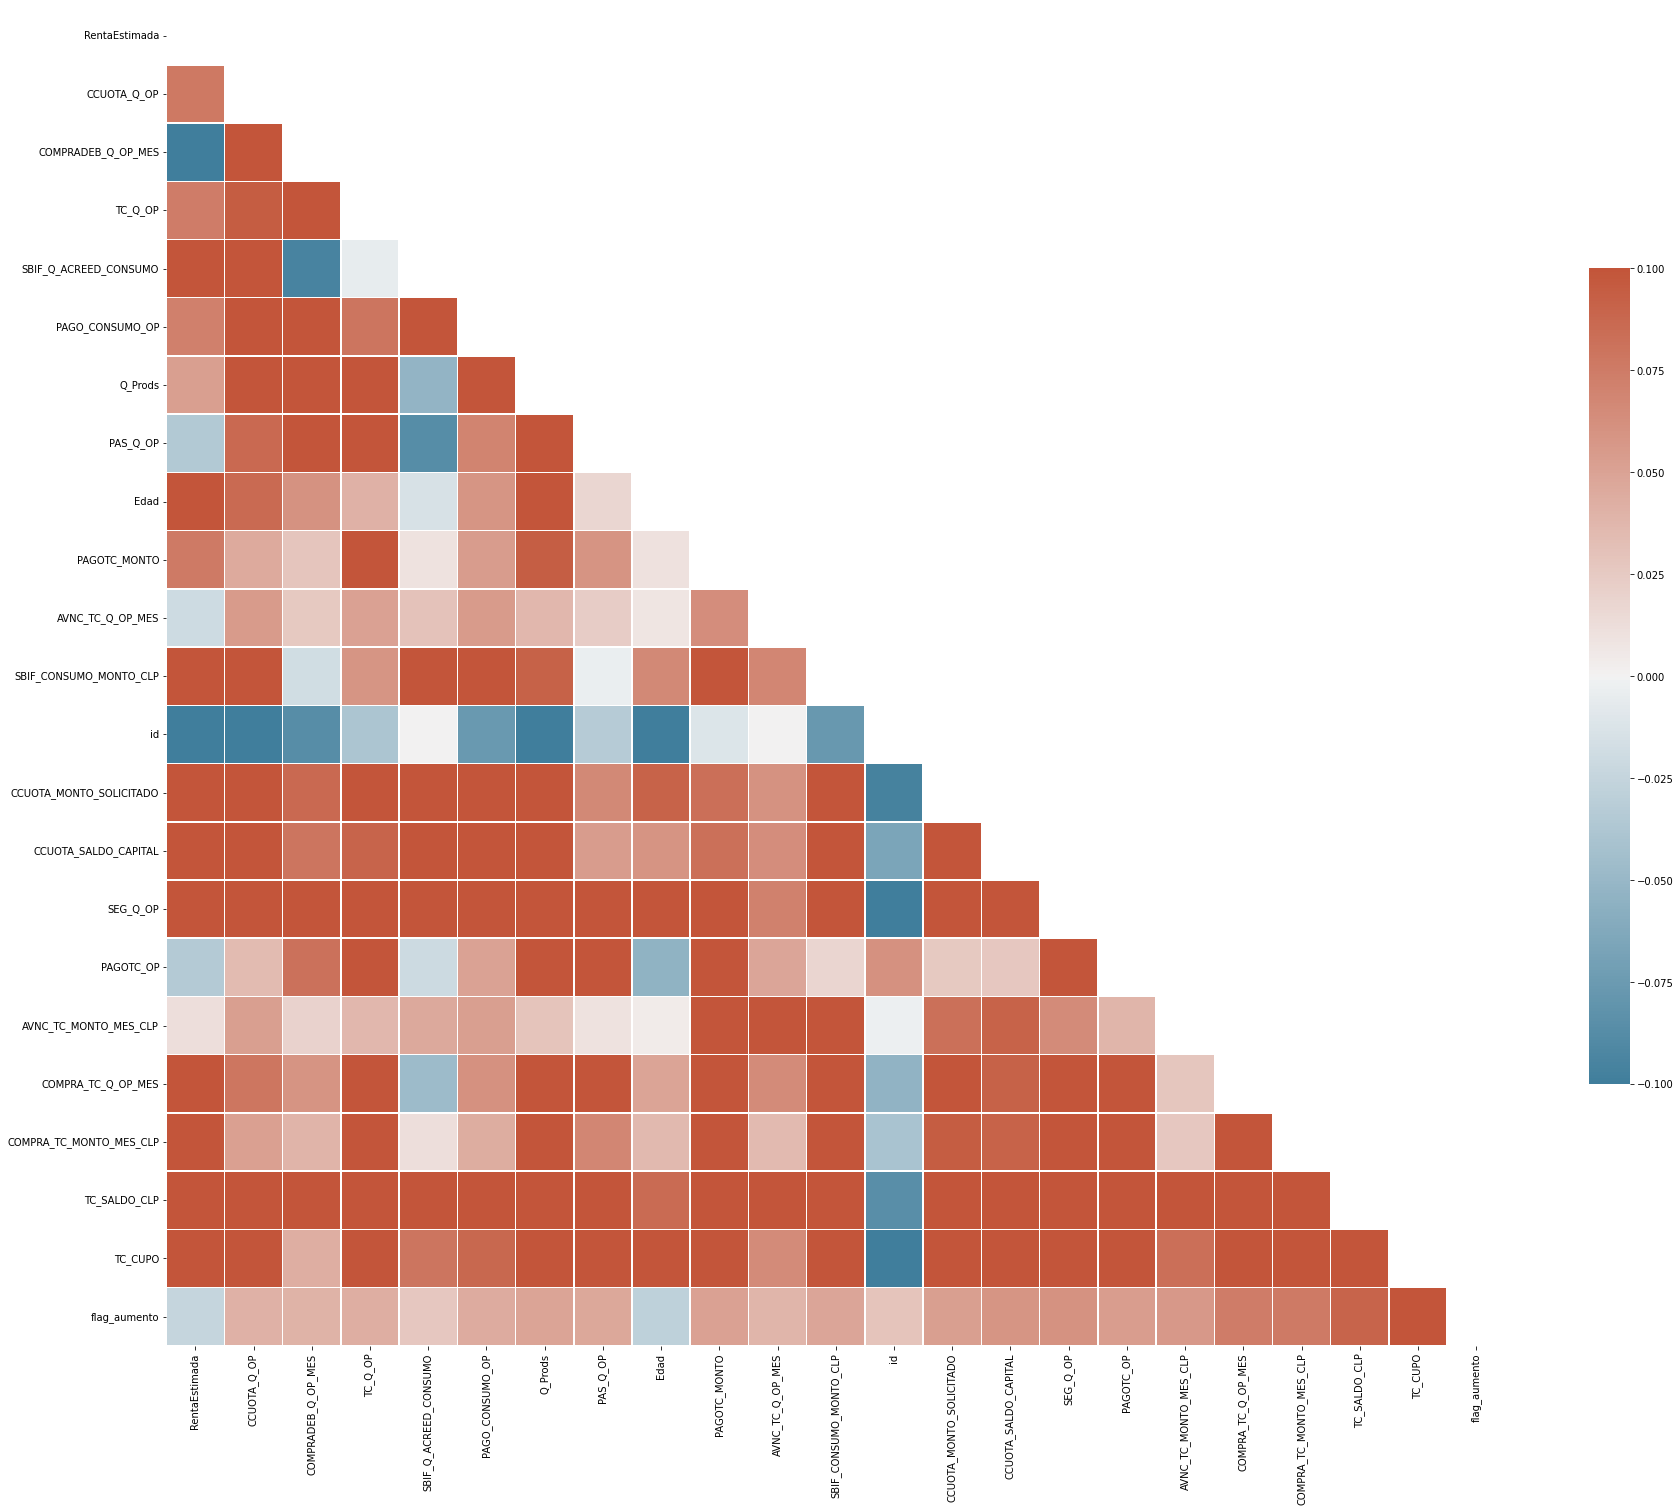

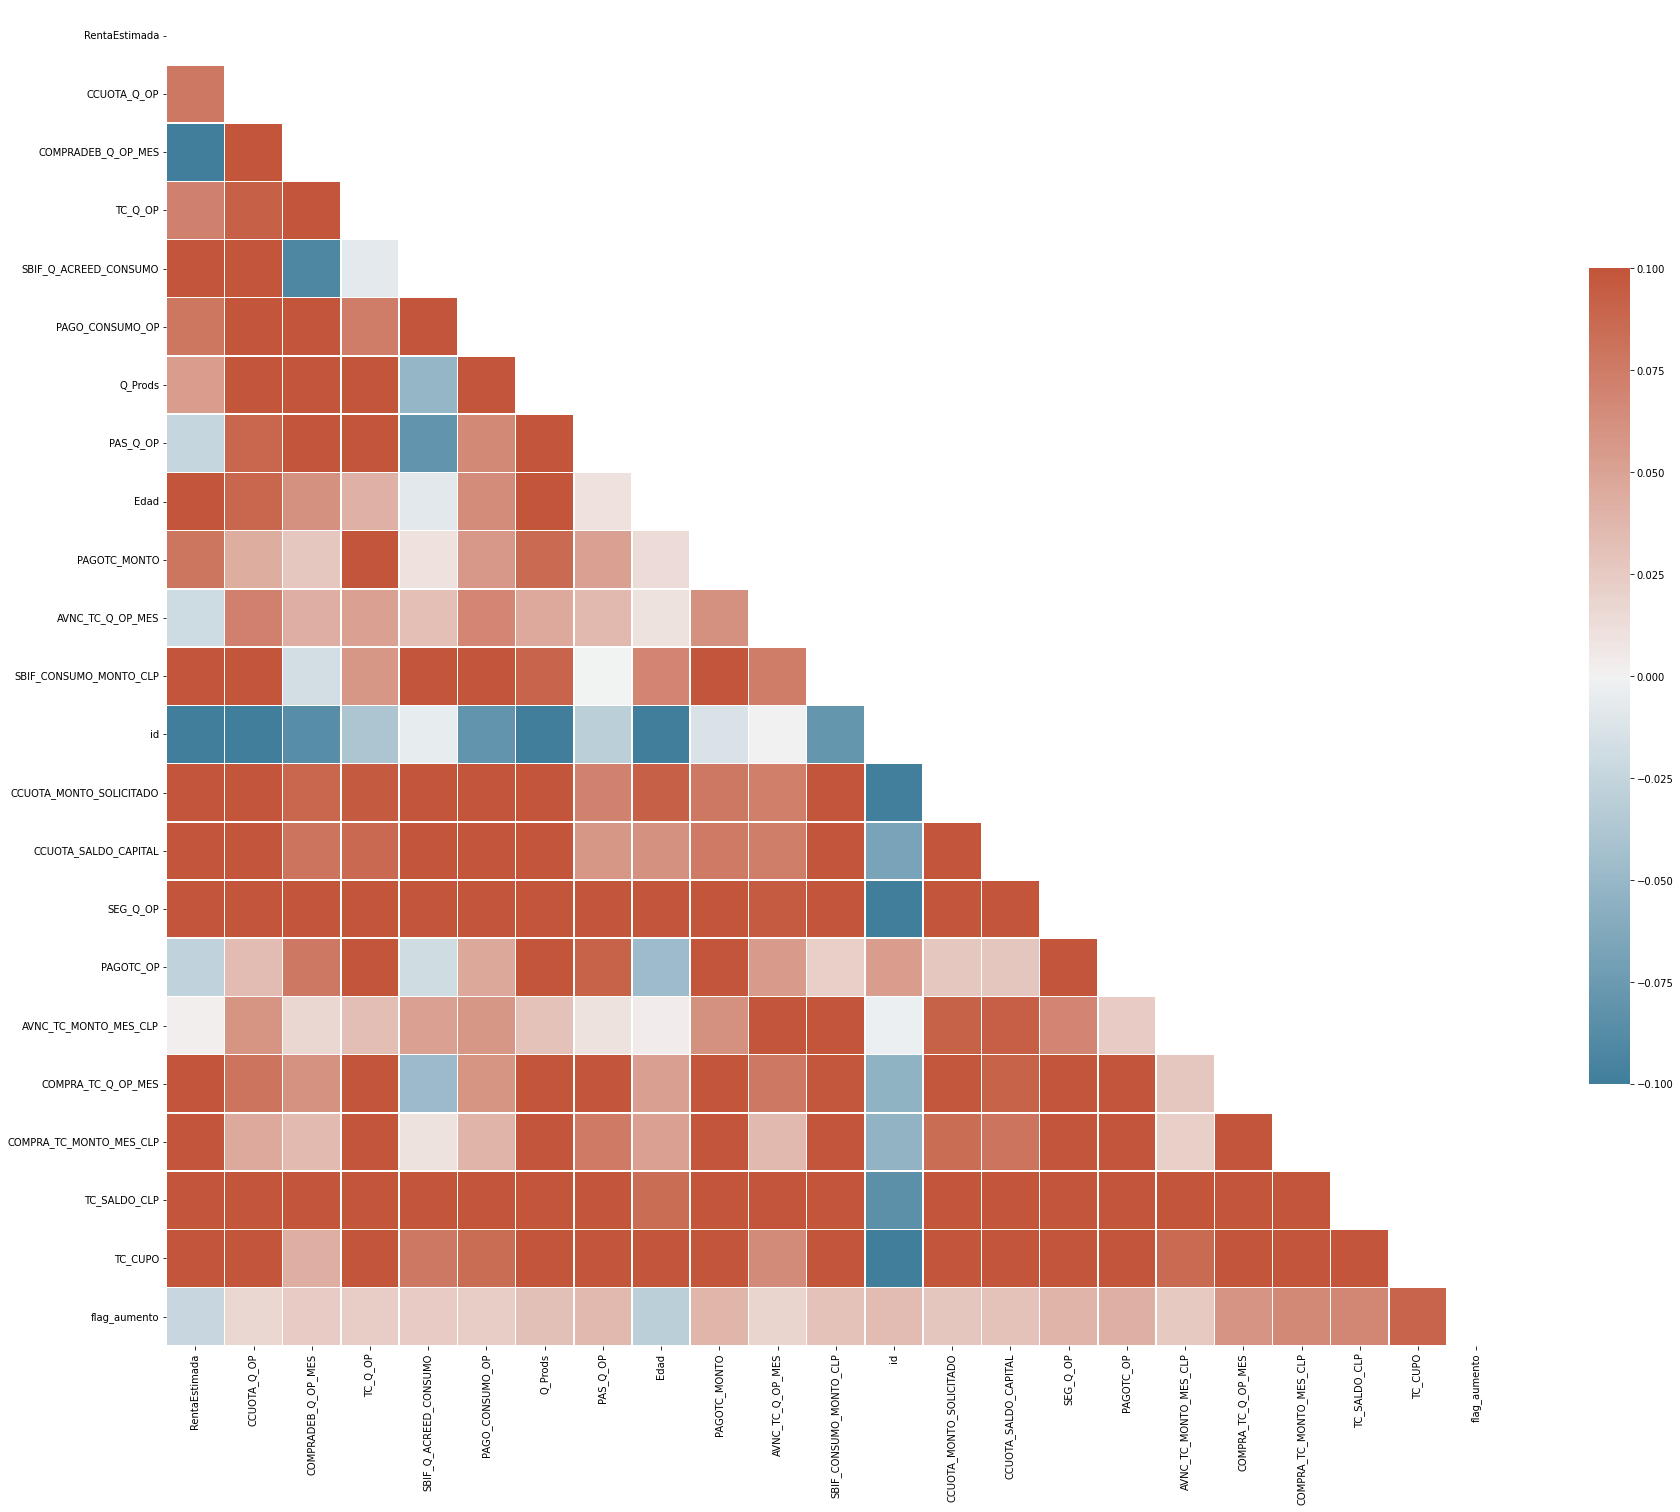

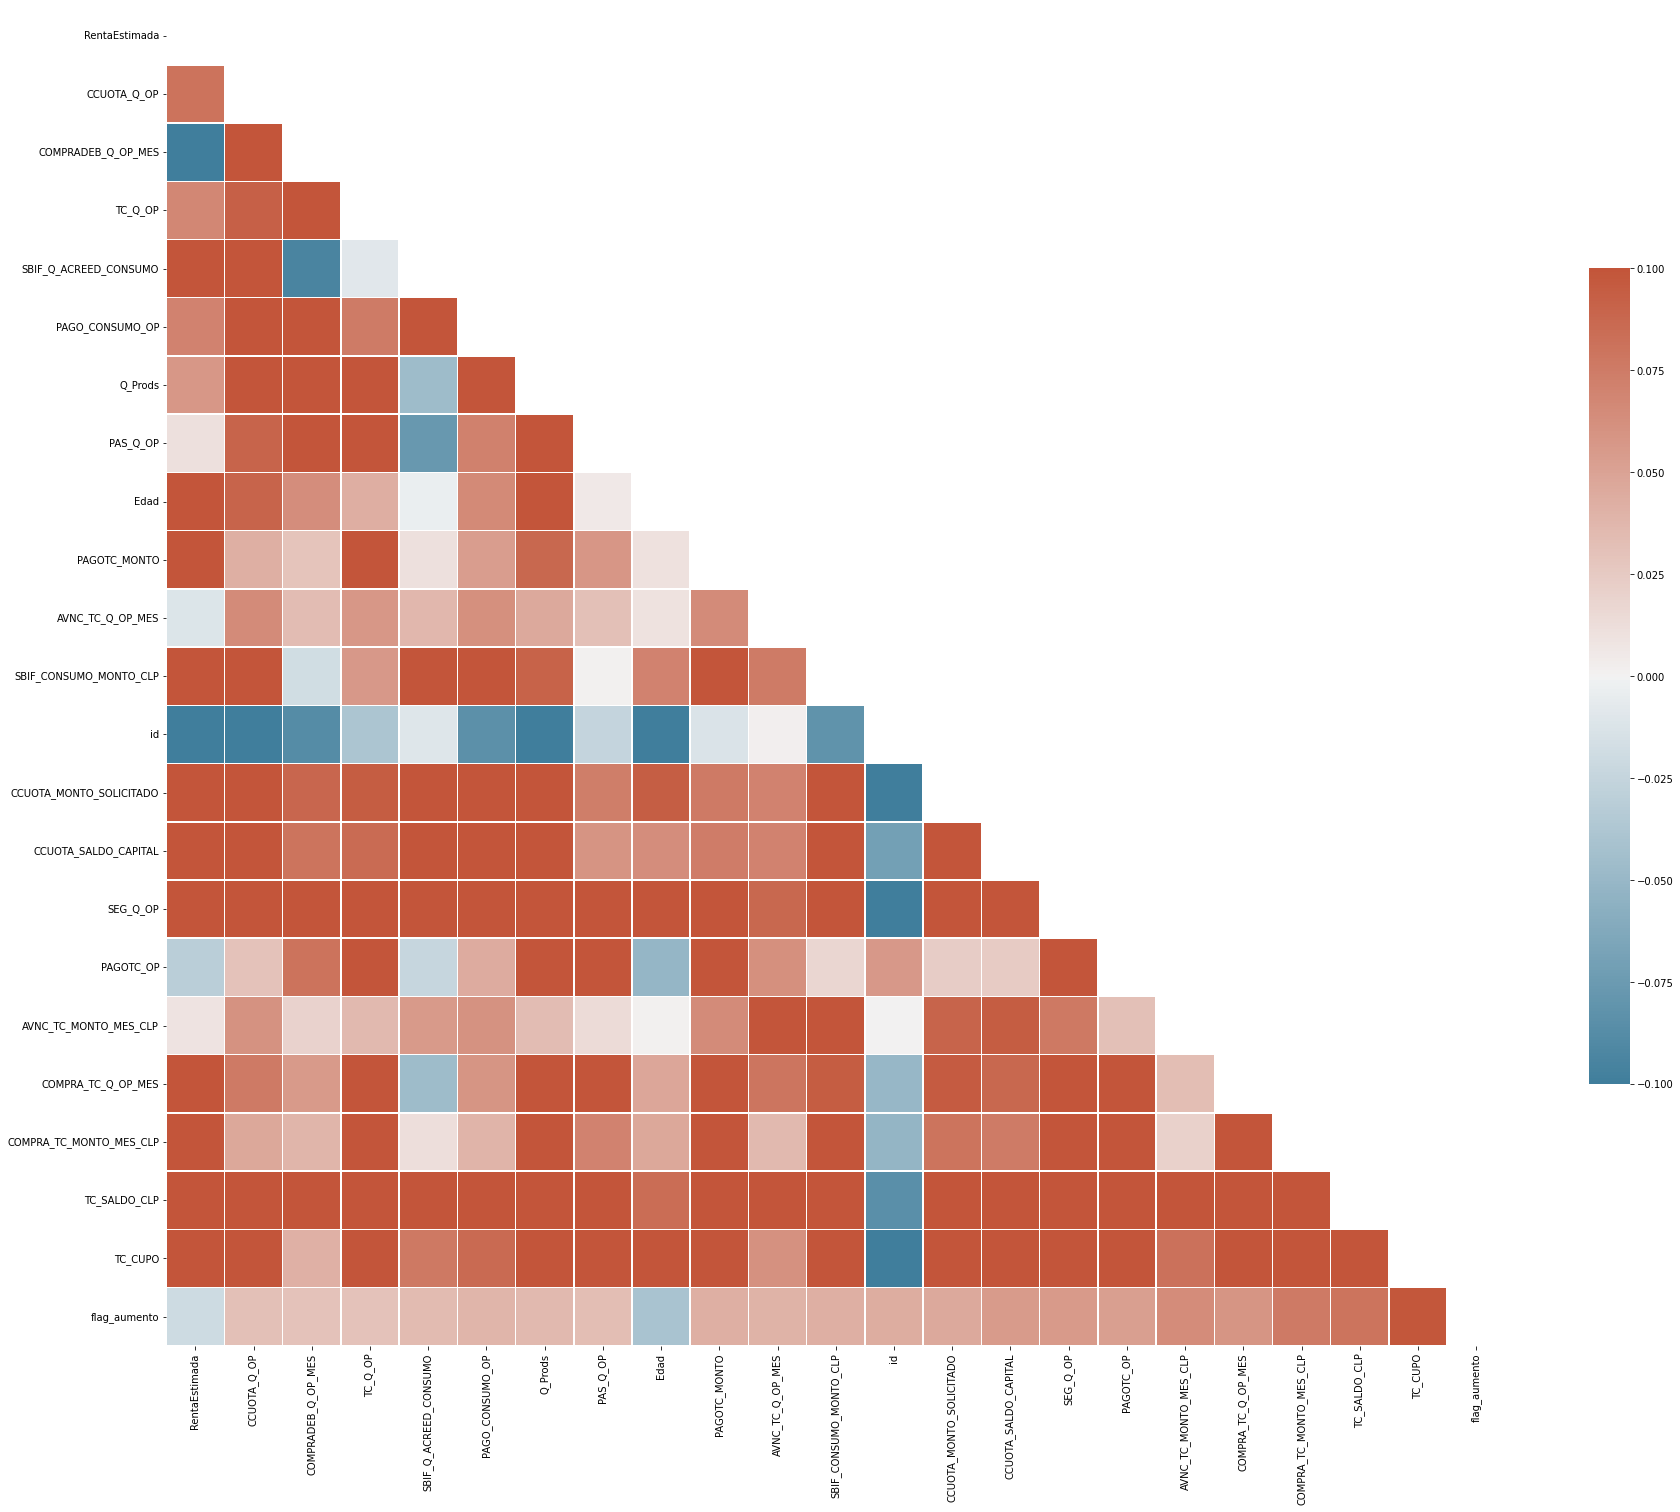

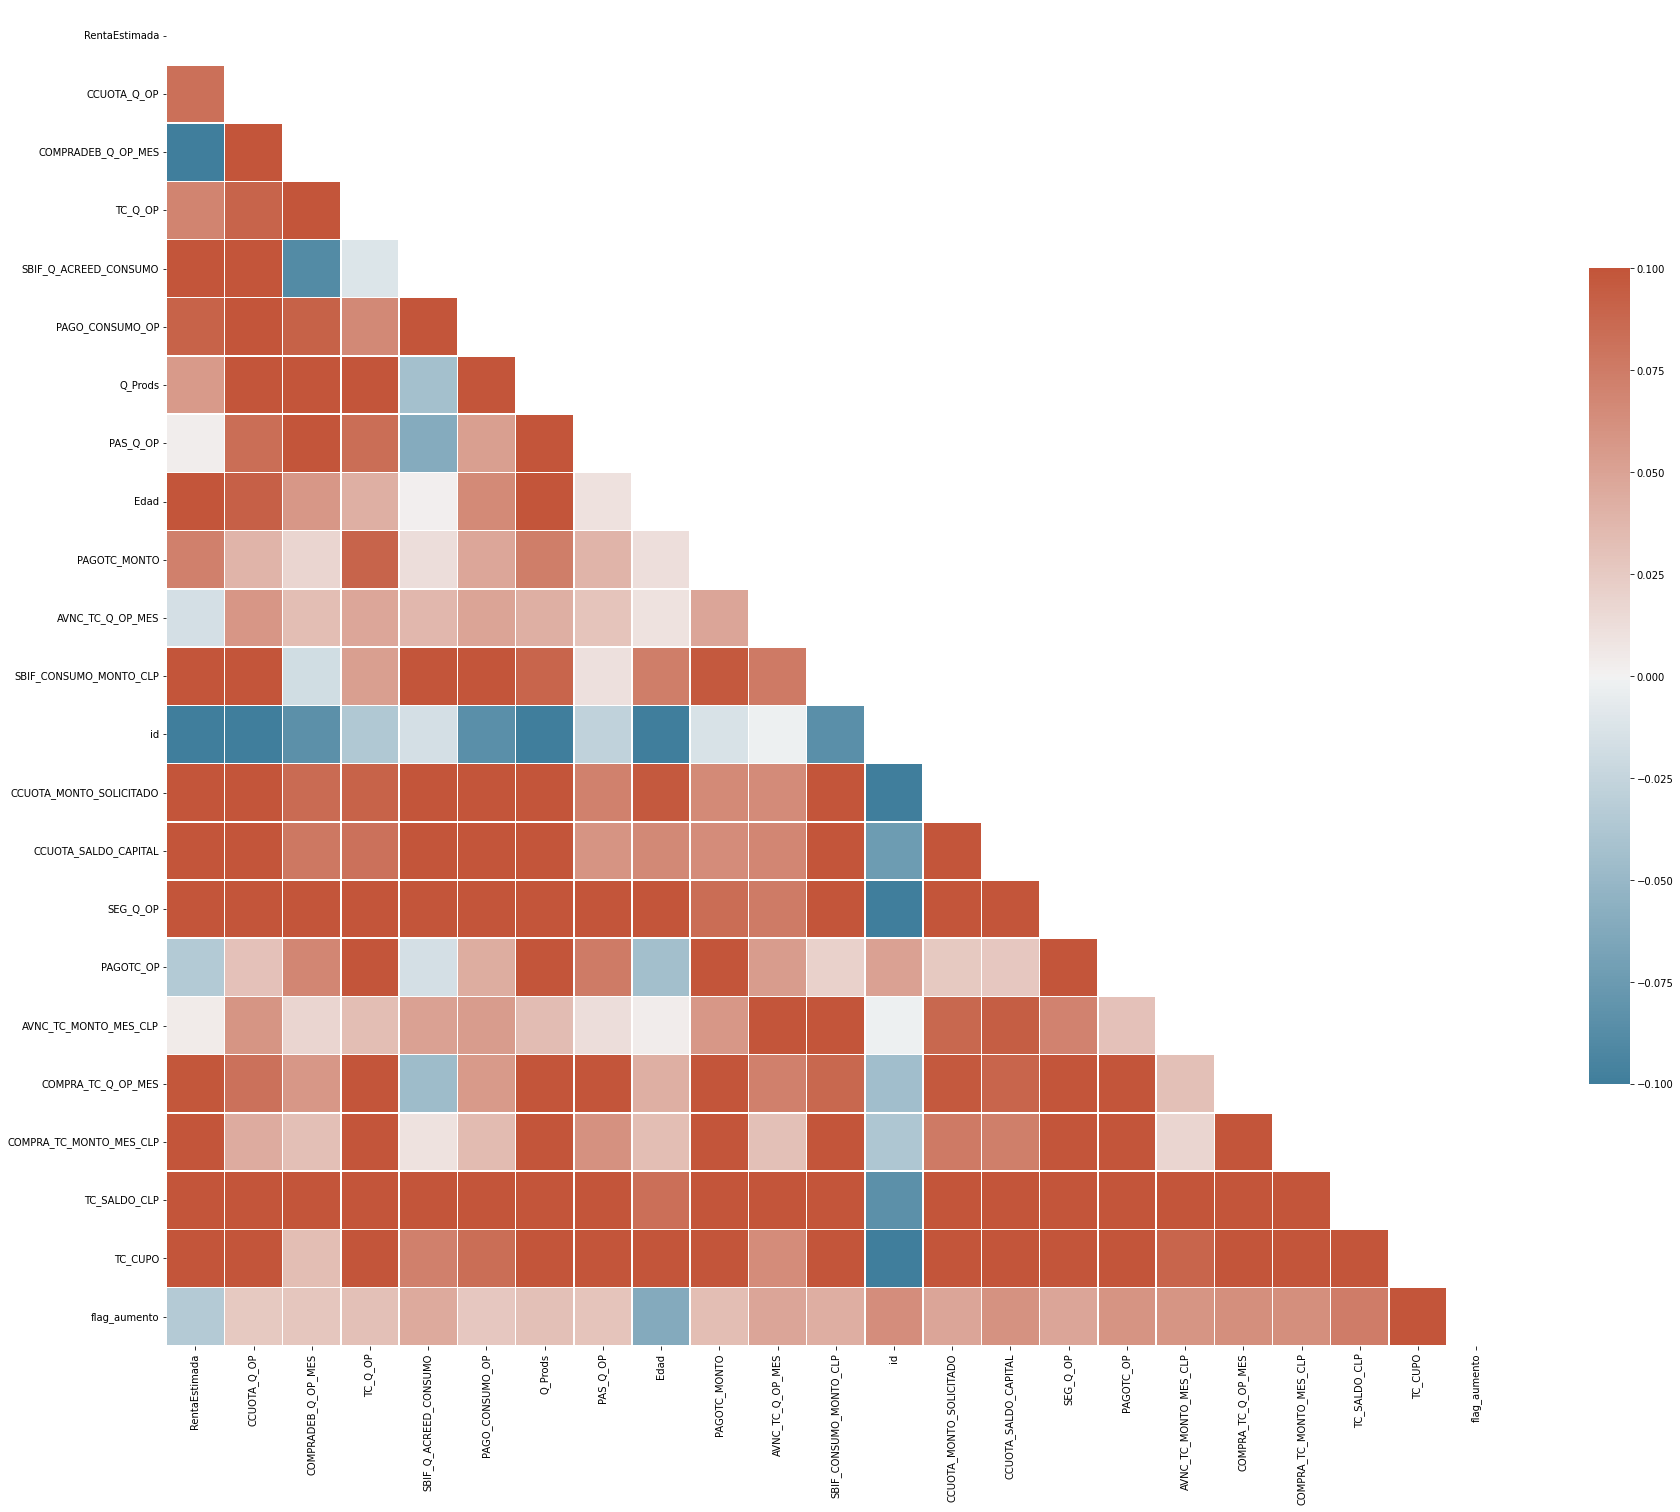

In [29]:
import seaborn as sns
selected_features =  ['RentaEstimada' ,
                      'CCUOTA_Q_OP' ,
                      'COMPRADEB_Q_OP_MES' ,
                      'TC_Q_OP' ,
                      'SBIF_Q_ACREED_CONSUMO' ,
                      'PAGO_CONSUMO_OP' ,
                      'Q_Prods' ,
                      'PAS_Q_OP' ,
                      'Edad' ,
                      'PAGOTC_MONTO' ,
                      'AVNC_TC_Q_OP_MES',
                      'SBIF_CONSUMO_MONTO_CLP' ,
                      'id',
                      'CCUOTA_MONTO_SOLICITADO',
                      'CCUOTA_SALDO_CAPITAL' ,
                      'SEG_Q_OP' ,
                      'PAGOTC_OP' ,
                      'AVNC_TC_MONTO_MES_CLP' ,
                      'COMPRA_TC_Q_OP_MES' ,
                      'COMPRA_TC_MONTO_MES_CLP' ,
                      'TC_SALDO_CLP' ,
                      'TC_CUPO' ,
                      'flag_aumento']


corr_2 = {}
for periodo in periodos:
  corr_2[periodo] = merged_dfs[periodo][selected_features].copy().corr()
  plt.figure(figsize = (30,30))
  mask = np.triu(np.ones_like(corr_2[periodo], dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr_2[periodo], mask=mask, cmap=cmap, vmax=.1, vmin =-0.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
  plt.show()

In [48]:
corr['flag_aumento'].sort_values().keys()

Index(['Edad', 'LCRED_CUPO', 'RentaEstimada', 'PAGO_HIPOTECARIO_OP',
       'PAC_Q_OP', 'PAGO_HIPOTECARIO_MONTO', 'LCRED_SALDO_CLP', 'HIPO_Q_OP',
       'CVISTA_SALDO_AVG_CLP', 'CVISTA_SALDO_CLP', 'DAP_SALDO_CLP',
       'PAGOAUTCUENTAS_MONTO', 'FFMM_Q_OP', 'FFMM_SALDO_PESOS',
       'SBIF_HP_MONTO_CLP', 'DAP_Q_OP', 'CCTE_SALDO_CLP', 'CHEQUE_OP',
       'CRENEG_Q_OP', 'PAGOCUENTAS_MONTO', 'SBIF_COMER_MONTO_CLP',
       'CRENEG_SALDO_CAPITAL', 'CRENEG_MONTO_SOLICITADO', 'RentaAltamira',
       'HIPO_SALDO_CLP', 'LCRED_Q_OP', 'PAGOAUTTC_MONTO', 'DEPOSITO_MONTO',
       'CHEQUE_MONTO', 'PAGOCUENTAS_OP', 'DEPOSITO_OP', 'PAGOLCRED_MONTO',
       'CCTE_Q_OP', 'VALEVISTA_OP', 'VALEVISTA_MONTO', 'PAS_MONTO',
       'GIROATM_MONTO_MES_CLP', 'TOTALABONO_MONTO', 'SBIF_LDISP_MONTO_CLP',
       'CVISTA_Q_OP', 'TOTALABONO_OP', 'SexoId', 'PAGO_CONSUMO_MONTO',
       'GIROATM_Q_OP_MES', 'PAT_Q_OP', 'Segmento', 'PAGOLCRED_OP',
       'COMPRAS_MONTO', 'COMPRADEB_MONTO_MES_CLP', 'COMPRAS_OP',
       'TRA

In [ ]:
#get the best features in merged_dfs with respect to flag_aumento
best_features = {}
for periodo in periodos:
    best_features[periodo] = abs(corr[periodo]['flag_aumento'].sort_values()).keys()
    